# Download data from datafed 

In [3]:
# transfer ds to nhi-gpu

import json # For dealing with metadata
import os # For file level operations
from datafed.CommandLib import API
df_api = API()

ls_resp = df_api.collectionItemsList('c/391027993')
print(ls_resp)

(item {
  id: "d/391002274"
  title: "YG_002-100mTorr_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 1076404480.0
  notes: 0
}
item {
  id: "d/391034672"
  title: "YG_002-100mTorr(down)_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 704002432.0
  notes: 0
}
item {
  id: "d/391036190"
  title: "YG_002-110mTorr_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 704002432.0
  notes: 0
}
item {
  id: "d/391037378"
  title: "YG_002-120mTorr_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 704002432.0
  notes: 0
}
item {
  id: "d/391036825"
  title: "YG_002-120mTorr(down)_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 704002432.0
  notes: 0
}
item {
  id: "d/391037980"
  title: "YG_002-130mTorr_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 704002432

In [5]:
dv_resp = df_api.dataView('d/394613028')
metadata = json.loads(dv_resp[0].data[0].metadata)
print(metadata)

id_index = dv_resp[0].data[0].id
get_resp = df_api.dataGet(id_index, '/scratch/yichen/pld_plumes/', orig_fname=True, wait=True)
get_resp

{'header': {'Base Pressure (Torr)': '1.9e-5', 'Chamber': 'Laser 1C', 'Cool Down Atmosphere': 'Vacuum', 'Date': '04/21/2022', 'Growth ID': 'YG009', 'Path': 'C:\\Image\\', 'Substrate_1': 'None', 'User Name': 'Yichen_Guo', 'time': '11:41:11'}, 'target_1': {'Aperture': '12.5', 'Atmosphere Gas': 'Oxygen', 'Attenuator(mm)': '2thin + 1thick', 'Focus(mm)': '140', 'Frequency(Hz)': '10', 'Laser Energy(mJ)': '100', 'Laser Voltage(kV)': '17.2', 'Measured Energy Mean(mJ)': '101', 'Measured Energy Std(mJ)': '1.99', 'Pressure(mTorr)': '200', 'Pulses': '15000', 'Target Height(mm)': '128.4', 'Target Material': 'SrRuO3', 'Temperature(°C)': '700'}, 'target_2': {'Frequency(Hz)': '15000', 'Pulses': '10', 'Target Material': 'SrRuO3'}}


(task {
   id: "task/394618238"
   type: TT_DATA_GET
   status: TS_SUCCEEDED
   client: "u/yig319"
   step: 2
   steps: 3
   msg: "Finished"
   ct: 1650574270
   ut: 1650574316
   source: "d/394613028"
   dest: "lehigh#nhi-gpu/scratch/yichen/pld_plumes"
 },
 'TaskDataReply')

# Load function

In [1]:
import sys
sys.path.append('../')

from utils import show_h5_dataset_name
from metrics_functions import load_h5_examples
from metrics_functions import show_images
from metrics_functions import PlotMetrics
from metrics_functions import plot_metrics
# import seaborn as sns
import numpy as np

In [ ]:
def plot_metrics(df, metrics_name, label_with='condition'):
    for metric in metrics_name:
        print(metric)
        sns.set(rc={'figure.figsize':(12,8)})
        sns.set_style("white")

        # bin to 10 growth_index classes
        if label_with == 'growth_index': 
            df = df.copy()
            start_index_list = np.arange(np.min(df['growth_index']), np.max(df['growth_index']), np.max(df['growth_index'])//10)

            for i in range(len(start_index_list)):
                if i == len(start_index_list)-1:
            #         print(i, start_index_list[i], np.max(df['growth_index']))
                    for index in range(start_index_list[i], np.max(df['growth_index'])):
                        df['growth_index'] = df['growth_index'].replace(index, start_index_list[i])
                else:
            #         print(i, start_index_list[i], start_index_list[i+1])
                    for index in range(start_index_list[i], start_index_list[i+1]):
                        df['growth_index'] = df['growth_index'].replace(index, start_index_list[i])
            
        plot = sns.lineplot(data=df[df['metric']==metric], 
                            x='time_step', y='a.u.', hue=label_with)
        plt.show()
    return df

In [28]:
plumes.shape

(221, 128, 250, 400)

# plot - 0

In [13]:
ds_path = '/scratch/yichen/pld_plumes/YG009_Yichen_Guo_04212022.h5'
class_name = 'PLD_Plumes'
show_h5_dataset_name(ds_path, class_name)

<KeysViewHDF5 ['0-SrRuO3', '1-SrRuO3']>


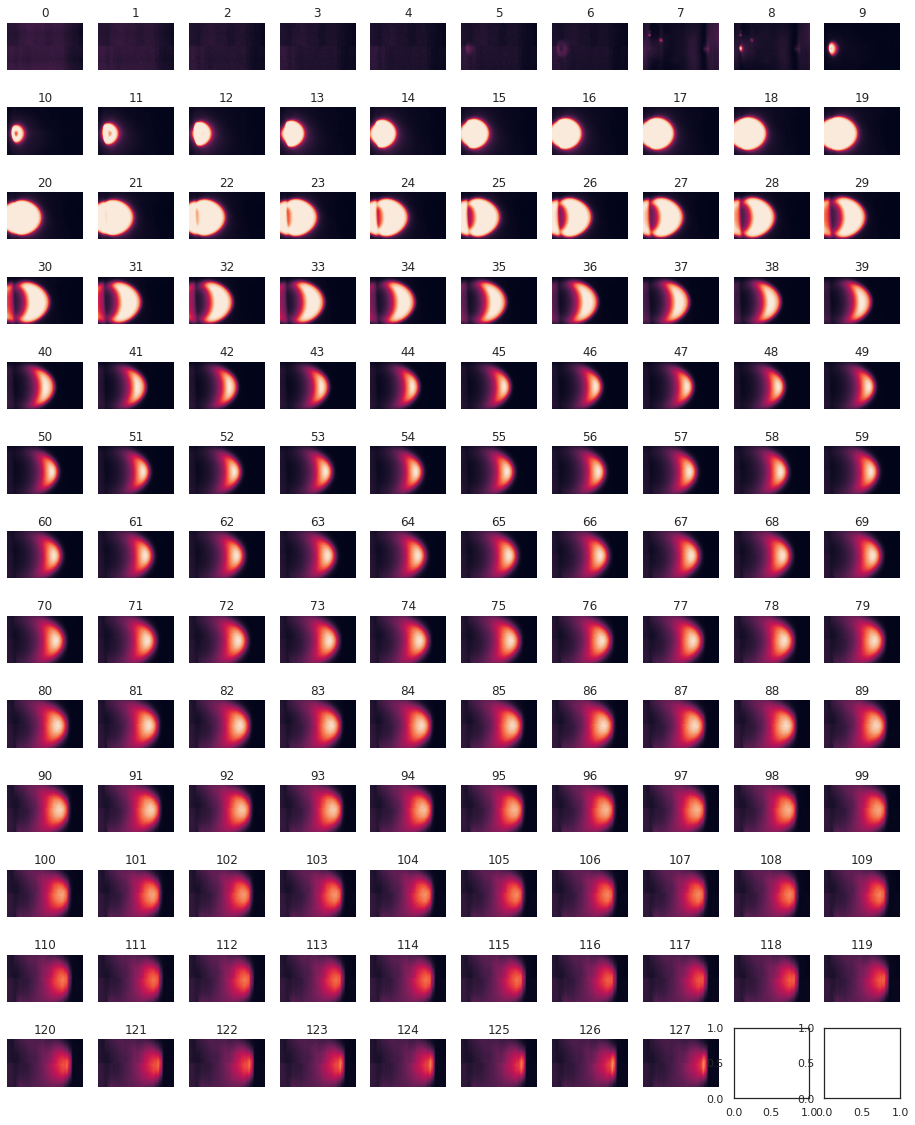

In [14]:
ds_name = '0-SrRuO3'
plumes = load_h5_examples(ds_path, class_name, ds_name, process_func, show=False)
show_images(np.mean(plumes, axis=0), img_per_row=10)

In [15]:
condition = '100mj-700c-200mtorr'
df = plumes_to_df(ds_path, ds_name, condition)
df.sample(n=5)

condition             metric  growth_index  time_step  a.u.
68741   100mj-700c-200mtorr  axis_major_length            95          5   0.0
8558    100mj-700c-200mtorr               area            66        110   0.0
73688   100mj-700c-200mtorr  axis_major_length           133         88   0.0
168184  100mj-700c-200mtorr         centroid-2           208        120   0.0
214453  100mj-700c-200mtorr       eccentricity           128         53   0.0

area


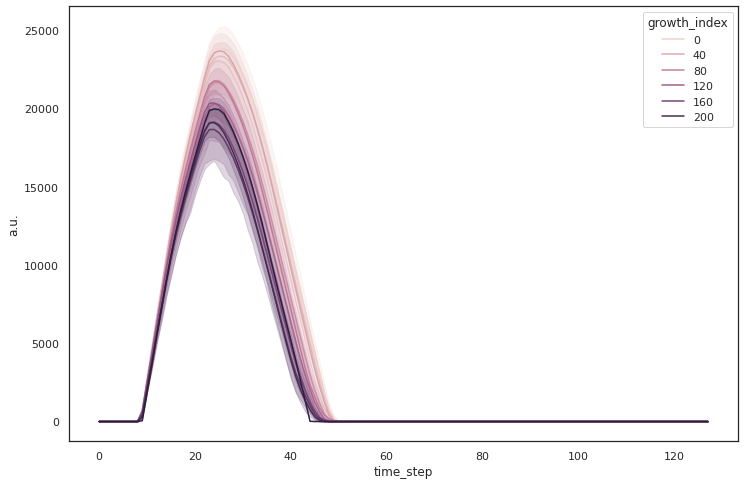

area_filled


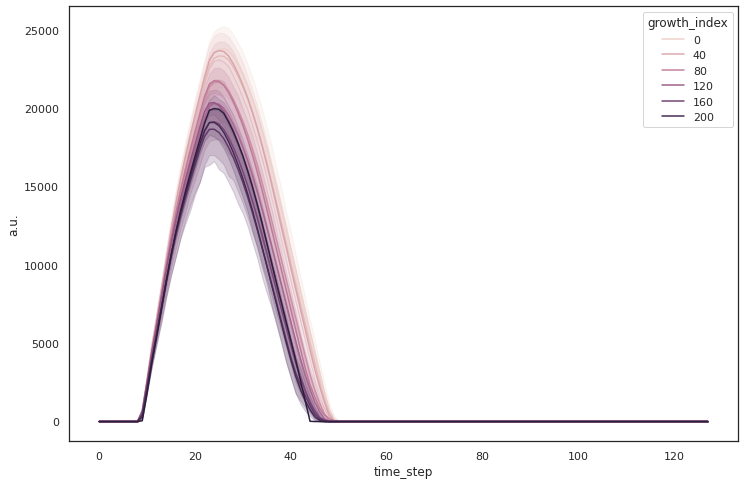

axis_major_length


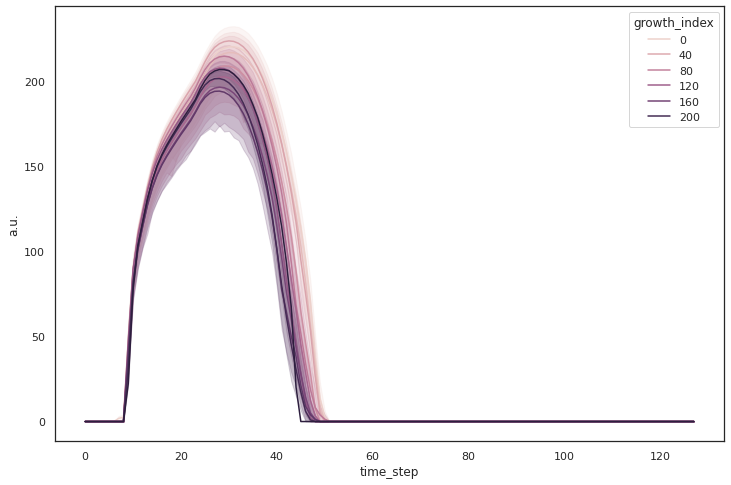

axis_minor_length


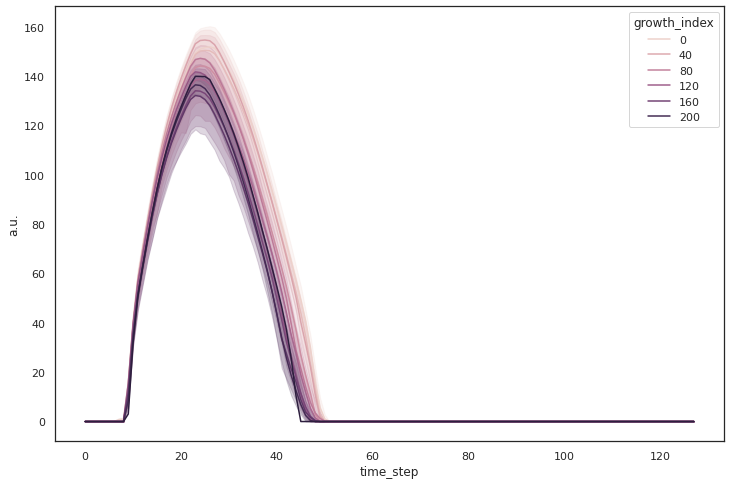

centroid-1


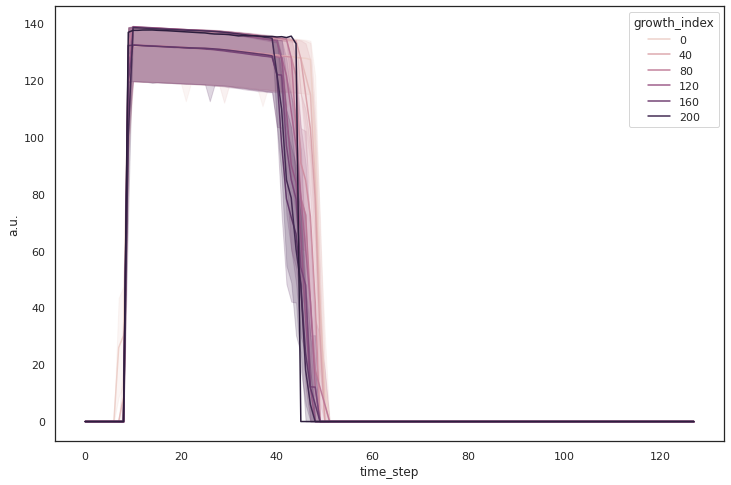

centroid-2


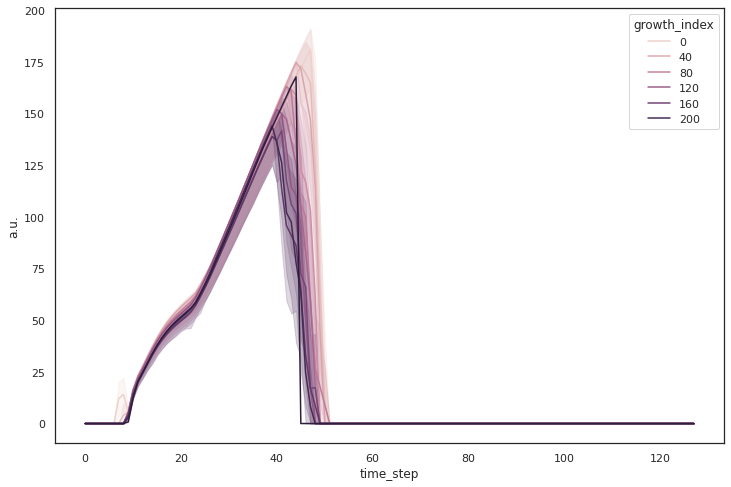

orientation


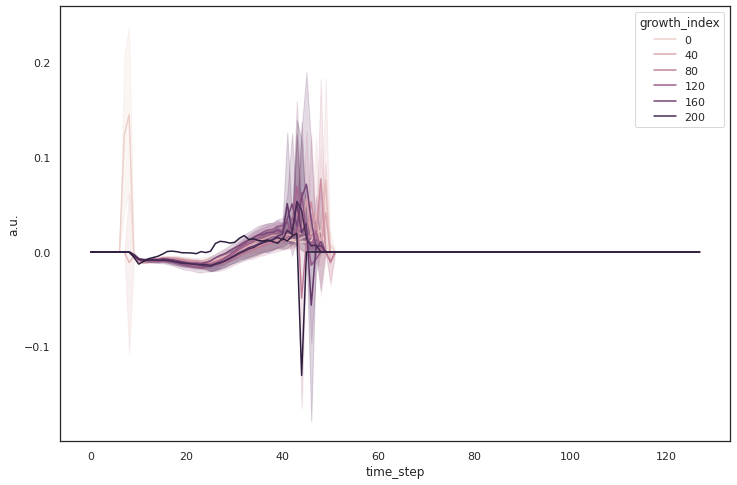

eccentricity


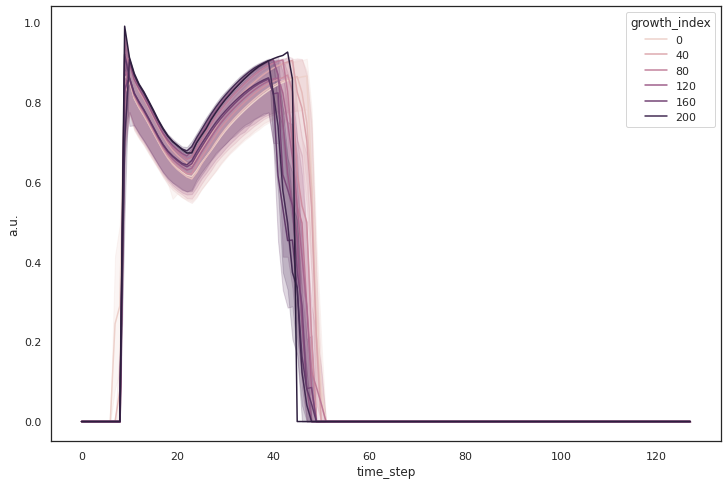

perimeter


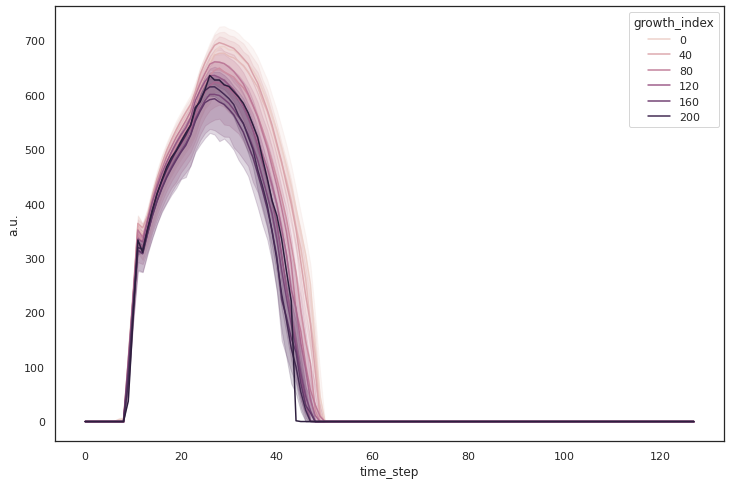

velocity


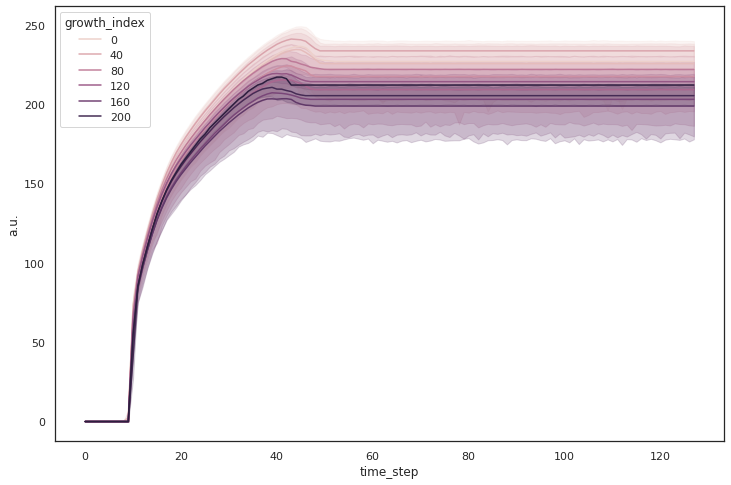

In [5]:
metrics_name = ['area', 'area_filled', 'axis_major_length', 
                'axis_minor_length', 'centroid-1', 'centroid-2', 'orientation', 
                'eccentricity', 'perimeter', 'velocity'] 
df_new = plot_metrics(df, metrics_name, label_with='growth_index')

In [6]:
df_new.sample(n=5)

condition        metric  growth_index  time_step       a.u.
274568  100mj-700c-200mtorr      velocity           154          8   0.000000
147858  100mj-700c-200mtorr    centroid-2            44         18  51.393299
222189  100mj-700c-200mtorr  eccentricity           176        109   0.000000
254203  100mj-700c-200mtorr     perimeter           198        123   0.000000
164737  100mj-700c-200mtorr    centroid-2           176          1   0.000000

area


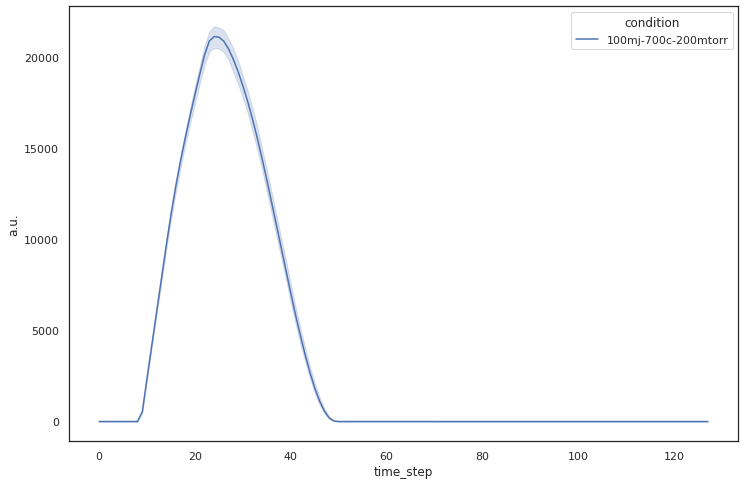

area_filled


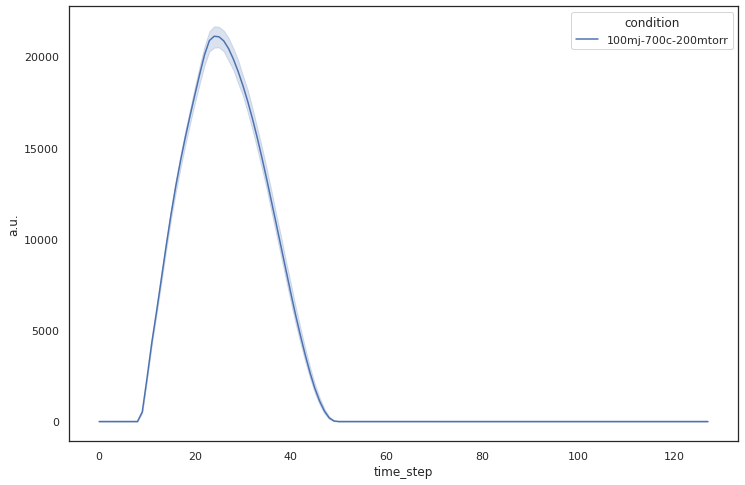

axis_major_length


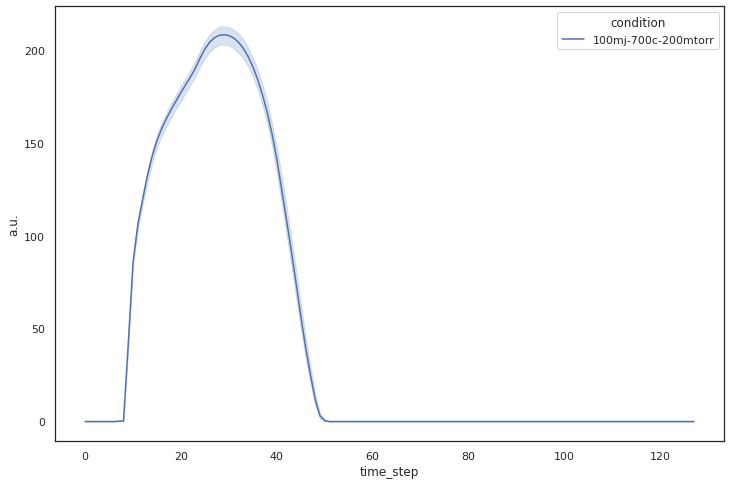

axis_minor_length


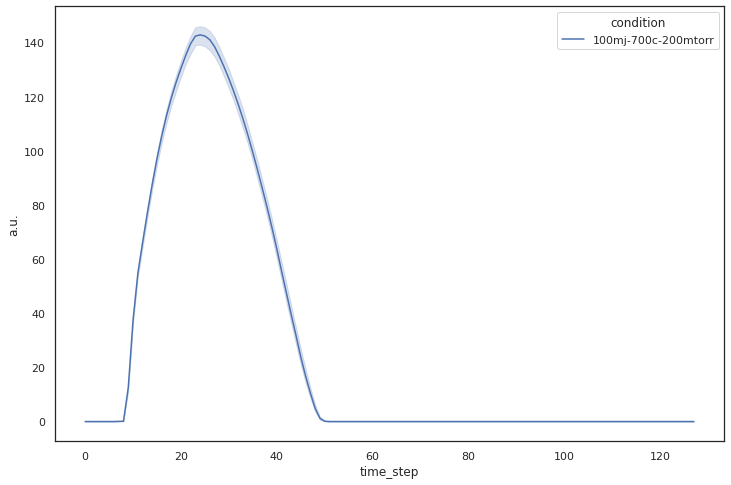

centroid-1


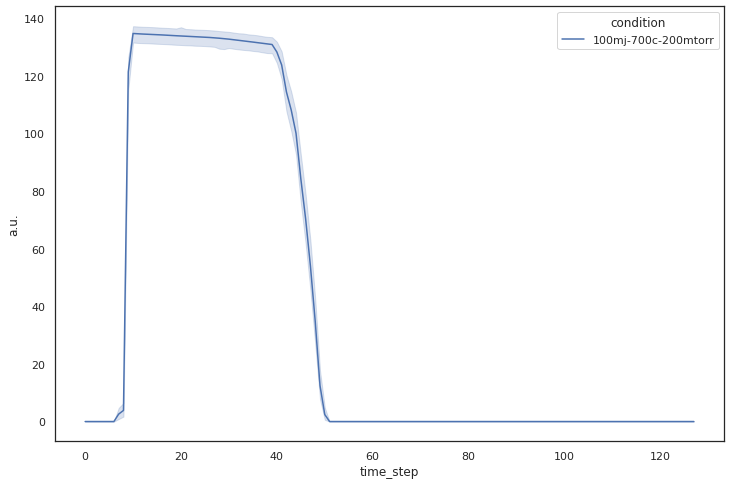

centroid-2


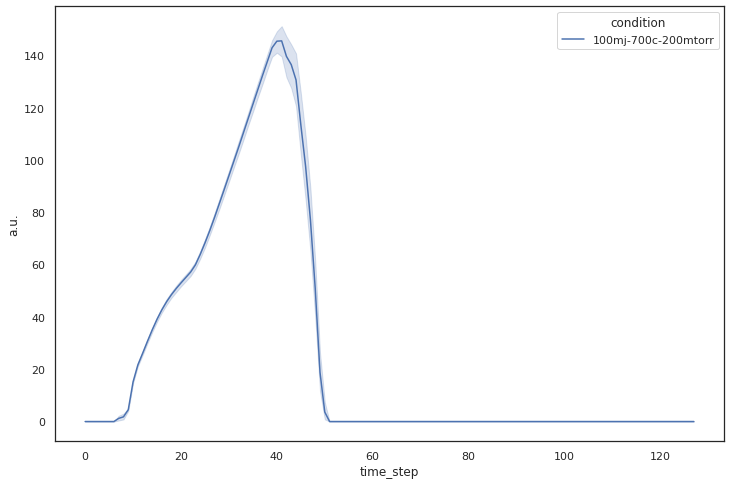

orientation


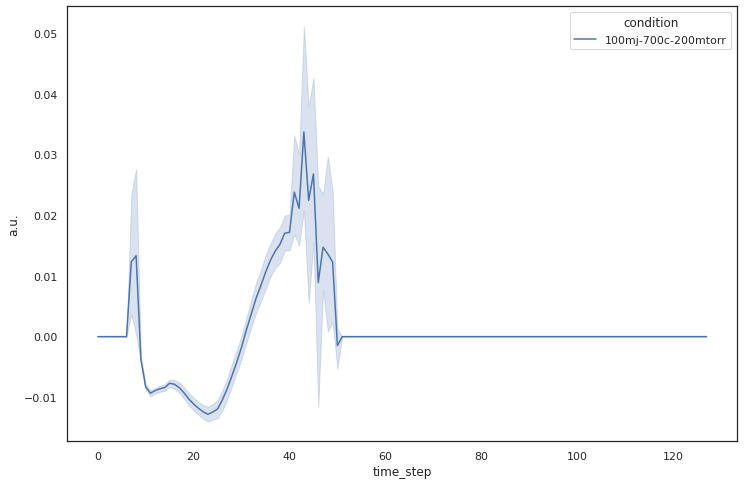

eccentricity


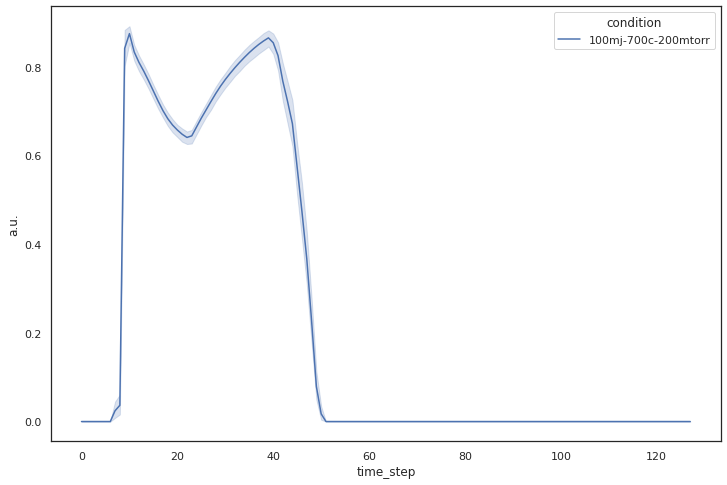

perimeter


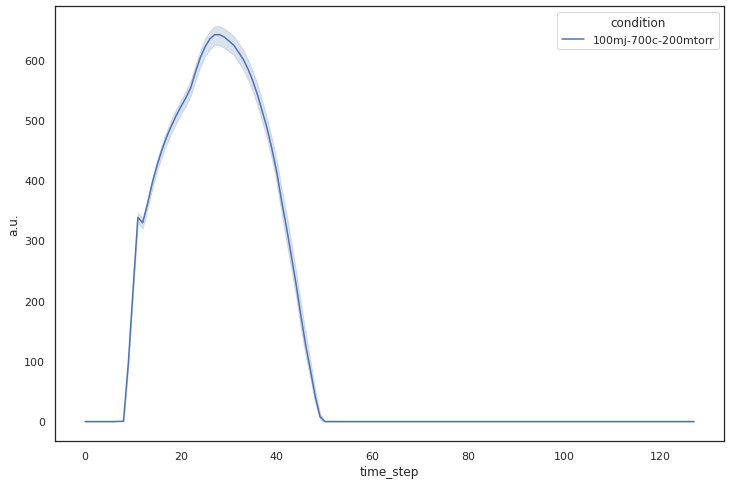

velocity


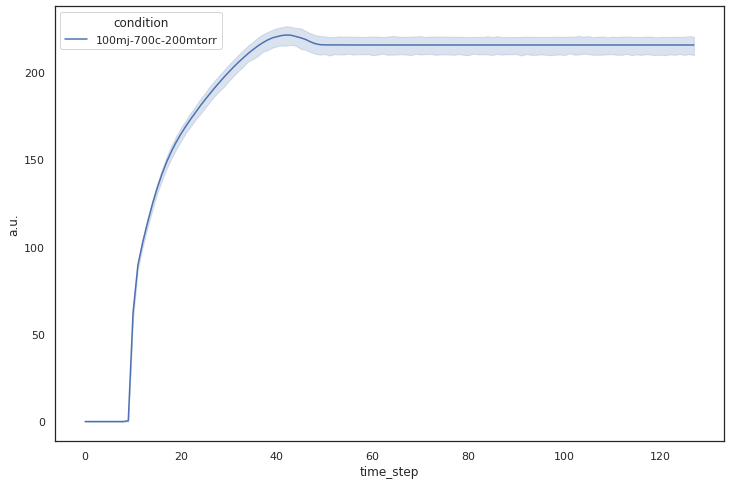

condition    metric  growth_index  time_step   a.u.
0       100mj-700c-200mtorr      area             0          0    0.0
1       100mj-700c-200mtorr      area             0          1    0.0
2       100mj-700c-200mtorr      area             0          2    0.0
3       100mj-700c-200mtorr      area             0          3    0.0
4       100mj-700c-200mtorr      area             0          4    0.0
...                     ...       ...           ...        ...    ...
282875  100mj-700c-200mtorr  velocity           220        123  212.0
282876  100mj-700c-200mtorr  velocity           220        124  212.0
282877  100mj-700c-200mtorr  velocity           220        125  212.0
282878  100mj-700c-200mtorr  velocity           220        126  212.0
282879  100mj-700c-200mtorr  velocity           220        127  212.0

[282880 rows x 5 columns]

In [7]:
metrics_name = ['area', 'area_filled', 'axis_major_length', 
                'axis_minor_length', 'centroid-1', 'centroid-2', 'orientation', 
                'eccentricity', 'perimeter', 'velocity'] 
plot_metrics(df, metrics_name, label_with='condition')

In [39]:
plumes.shape

(221, 128, 250, 400)

# 0-75000

In [40]:
df_fine = df[df['growth_index']<110]
df_fine.sample(5)

condition        metric  growth_index  time_step        a.u.
198916  100mj-700c-200mtorr  eccentricity             7          4    0.000000
205599  100mj-700c-200mtorr  eccentricity            59         31    0.771171
154714  100mj-700c-200mtorr    centroid-2           103         90    0.000000
240051  100mj-700c-200mtorr     perimeter           107         51    0.000000
257811  100mj-700c-200mtorr      velocity            25         19  169.000000

area


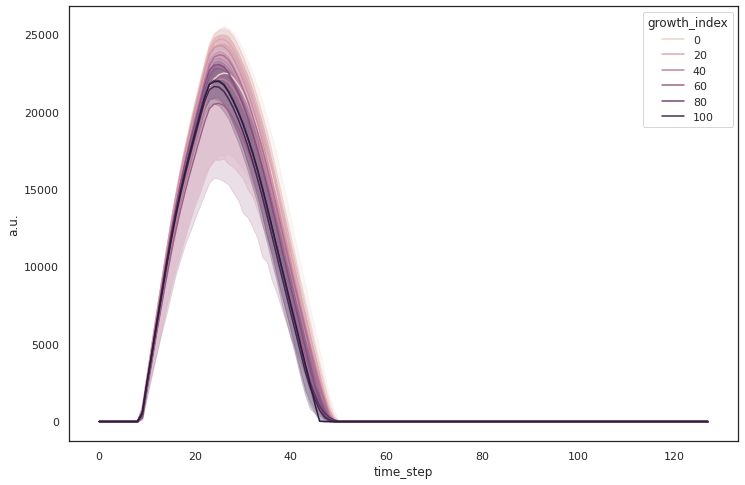

axis_major_length


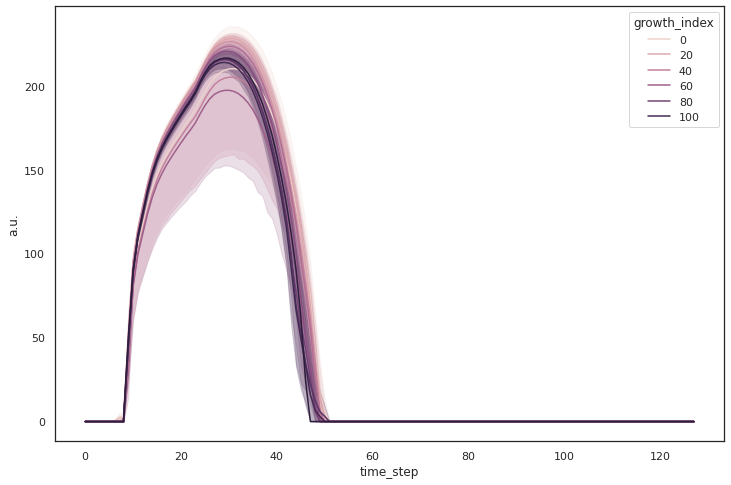

axis_minor_length


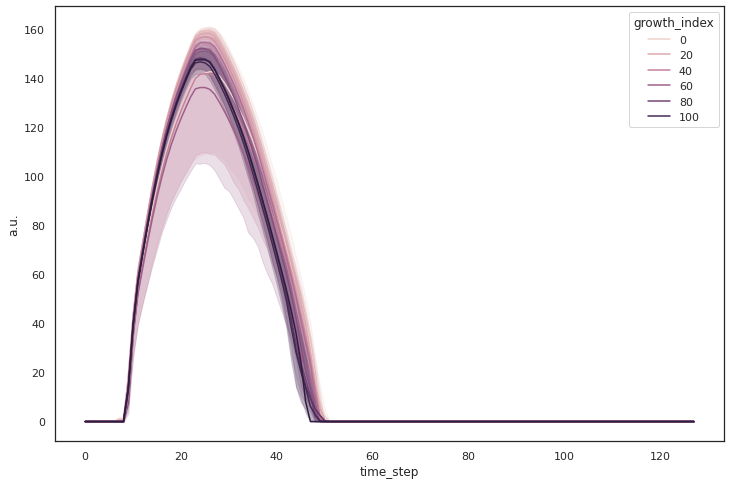

centroid-1


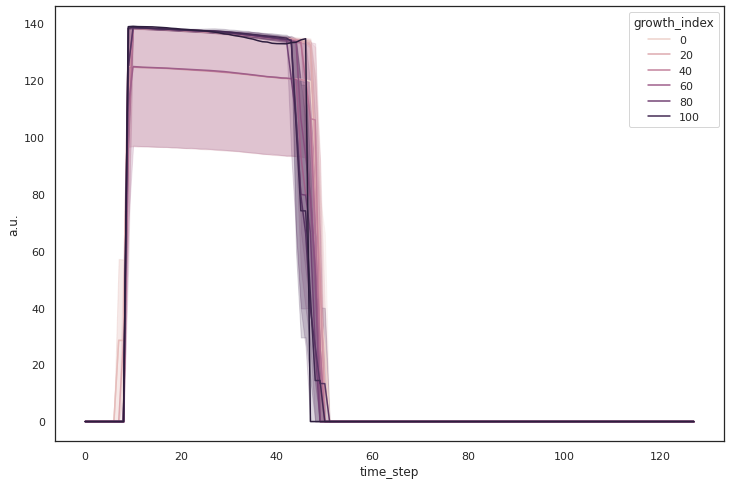

centroid-2


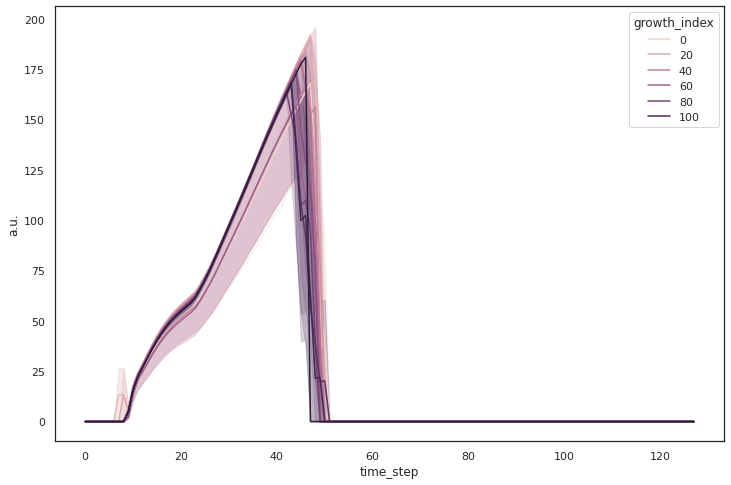

eccentricity


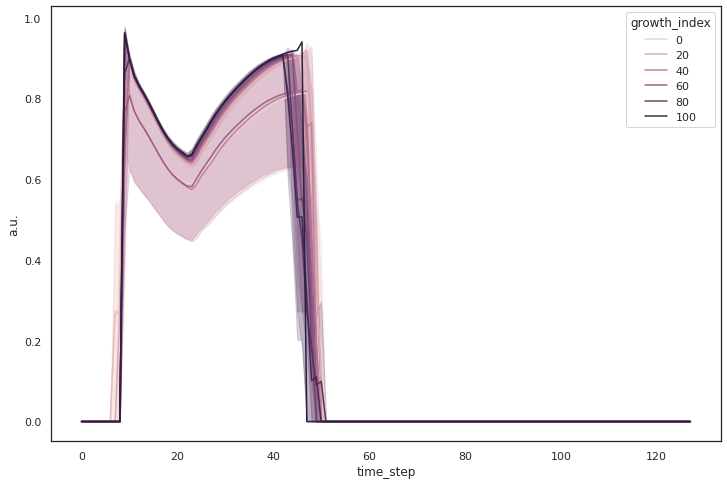

velocity


In [ ]:
metrics_name = ['area', 'axis_major_length', 'axis_minor_length', 'centroid-1', 'centroid-2', 
                'eccentricity', 'velocity'] 
df_new = plot_metrics(df_fine, metrics_name, label_with='growth_index')

### finer step: 0-1500

In [29]:
df_fine = df[df['growth_index']<20]
df_fine.sample(5)

condition             metric  growth_index  time_step  \
121     100mj-700c-200mtorr               area             0        121   
170774  100mj-700c-200mtorr        orientation             8         22   
228308  100mj-700c-200mtorr          perimeter            15         84   
1032    100mj-700c-200mtorr               area             8          8   
85804   100mj-700c-200mtorr  axis_minor_length             7         44   

             a.u.  
121      0.000000  
170774  -0.021137  
228308   0.000000  
1032     0.000000  
85804   58.805443

area


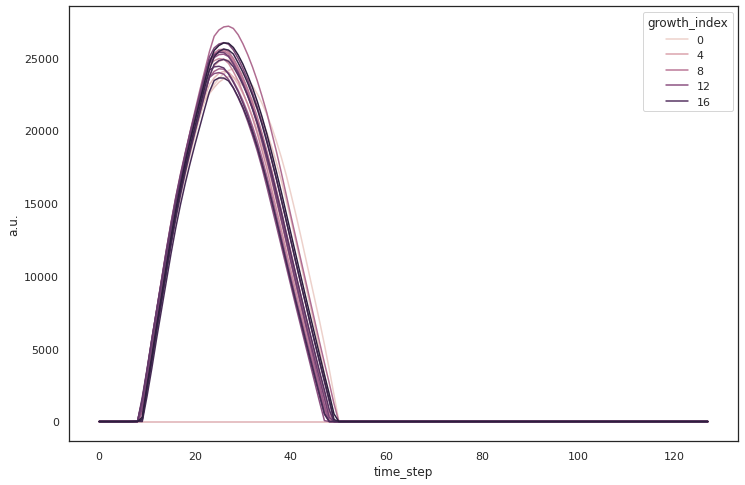

axis_major_length


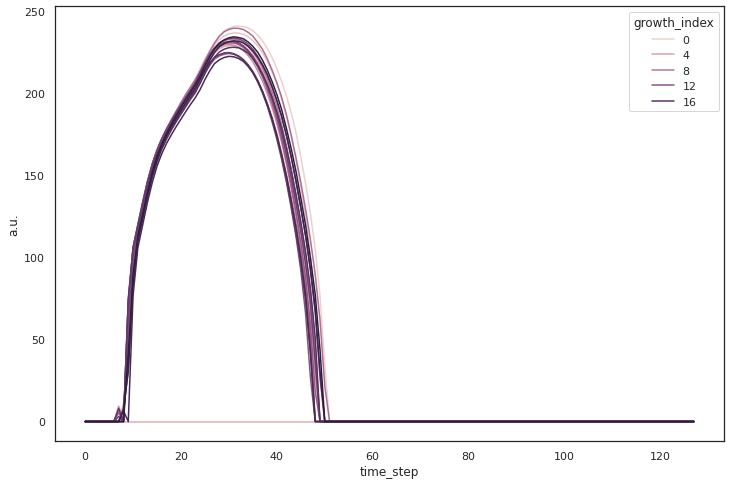

axis_minor_length


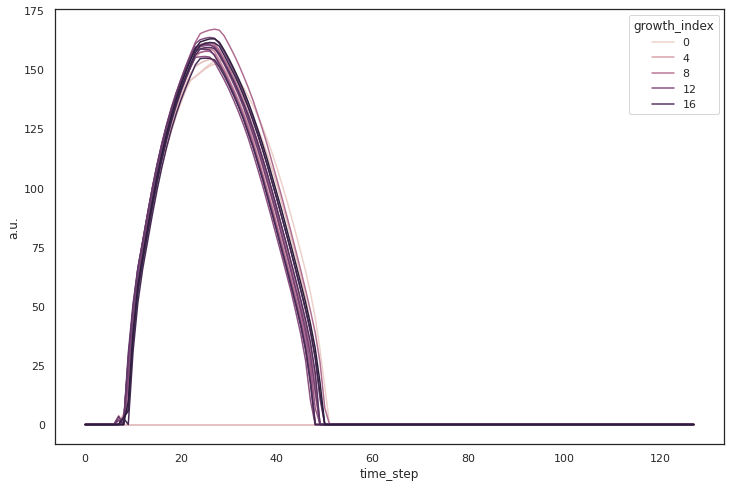

centroid-1


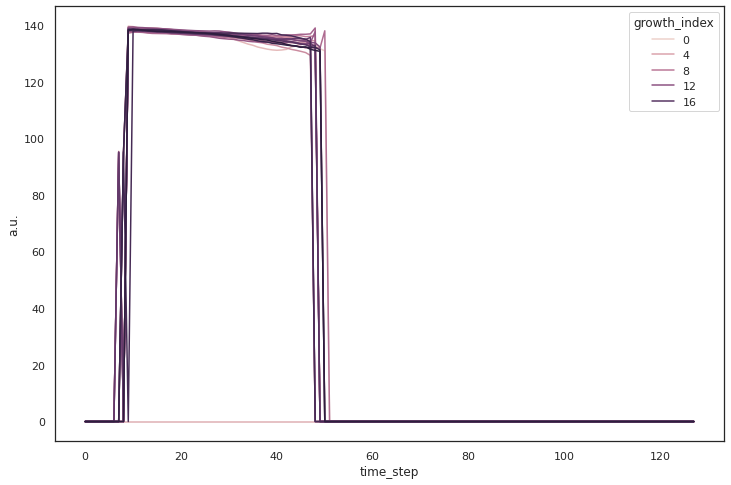

centroid-2


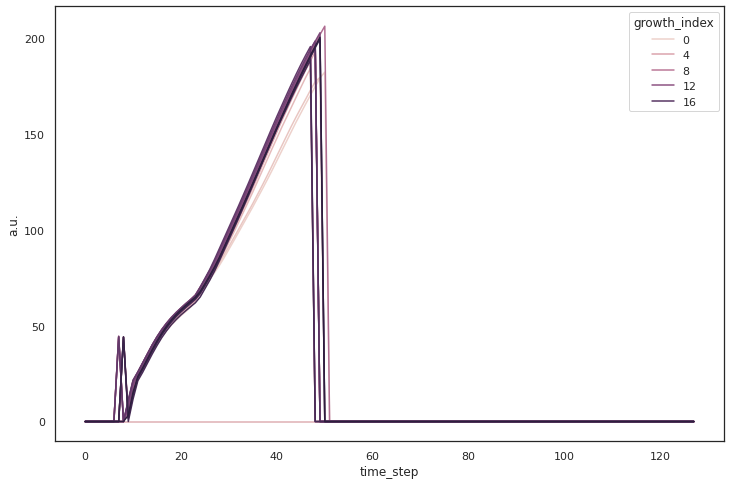

eccentricity


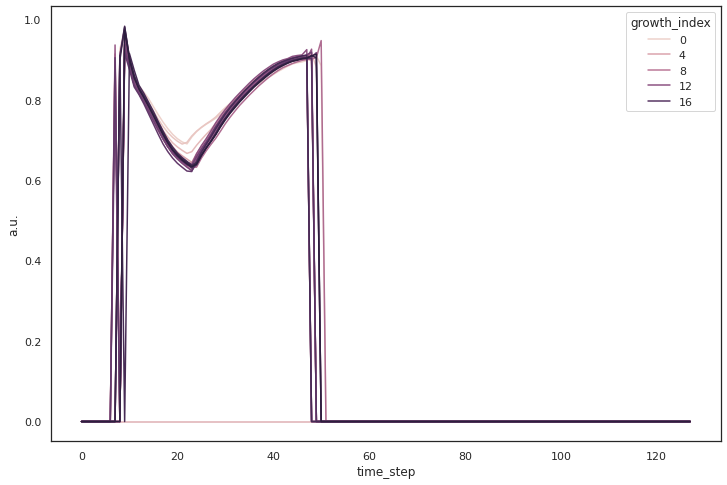

velocity


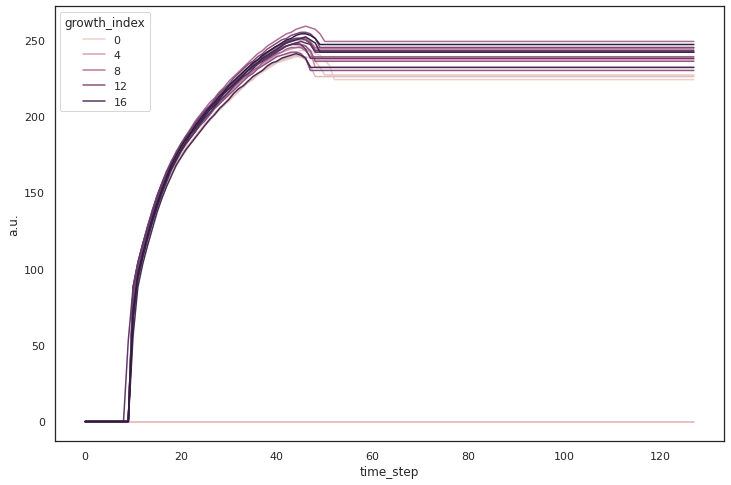

In [30]:
metrics_name = ['area', 'axis_major_length', 'axis_minor_length', 'centroid-1', 'centroid-2', 
                'eccentricity', 'velocity'] 
df_new = plot_metrics(df_fine, metrics_name, label_with='growth_index')

### finer step: 1500-3000

In [31]:
df_fine = df[df['growth_index']<40]
df_fine = df_fine[df_fine['growth_index']>20]
df_fine.sample(5)

condition             metric  growth_index  time_step  a.u.
230767  100mj-700c-200mtorr          perimeter            34        111   0.0
59626   100mj-700c-200mtorr  axis_major_length            23        106   0.0
144617  100mj-700c-200mtorr         centroid-2            24        105   0.0
89687   100mj-700c-200mtorr  axis_minor_length            37         87   0.0
87812   100mj-700c-200mtorr  axis_minor_length            23          4   0.0

area


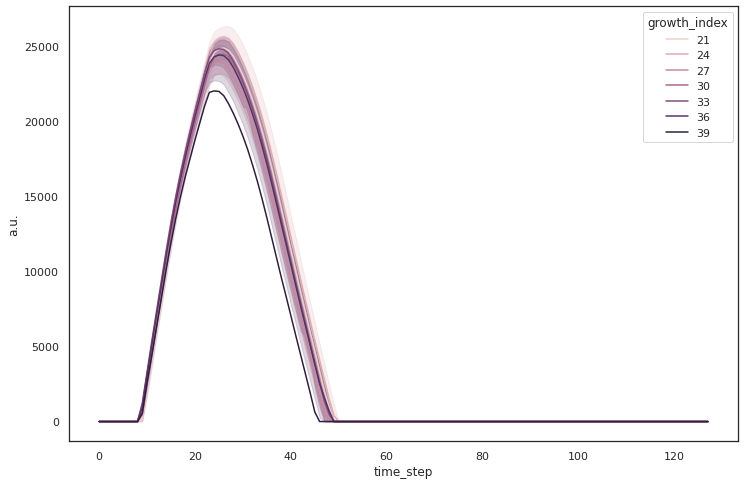

axis_major_length


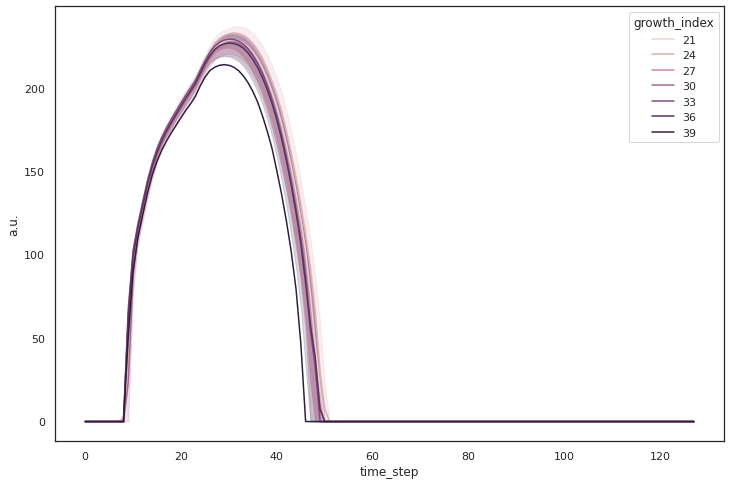

axis_minor_length


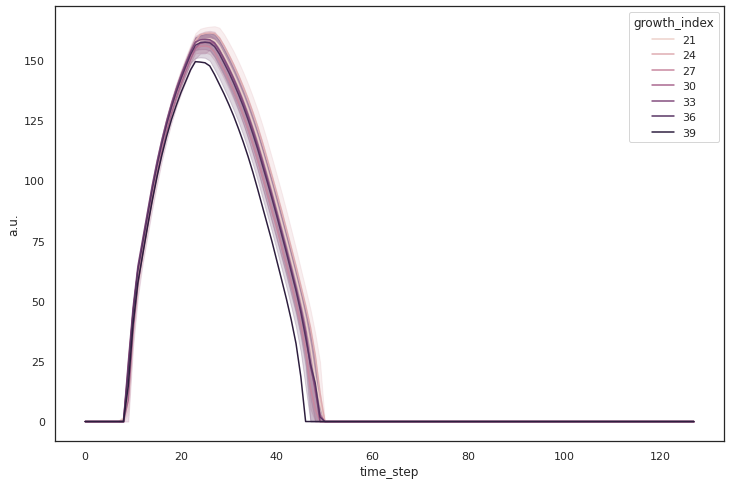

centroid-1


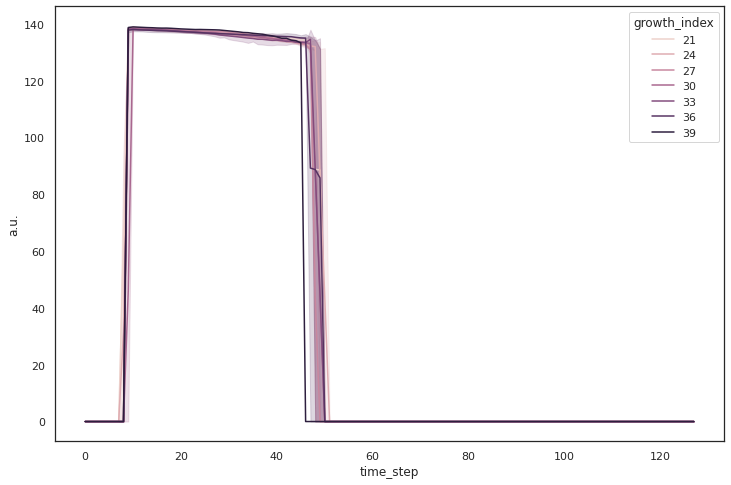

centroid-2


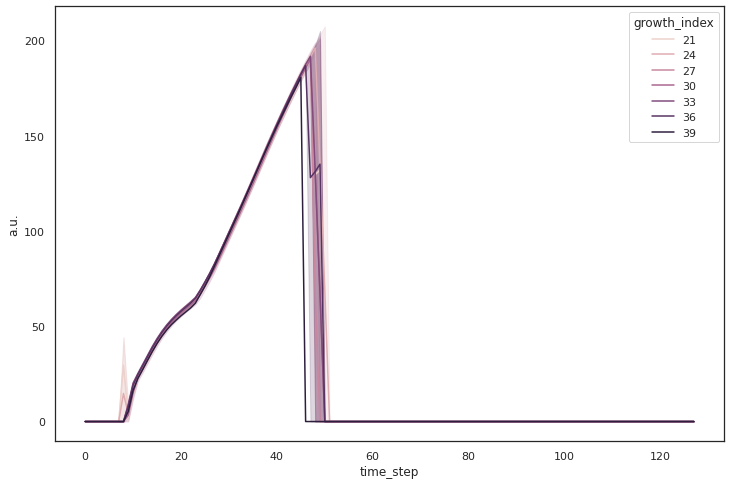

eccentricity


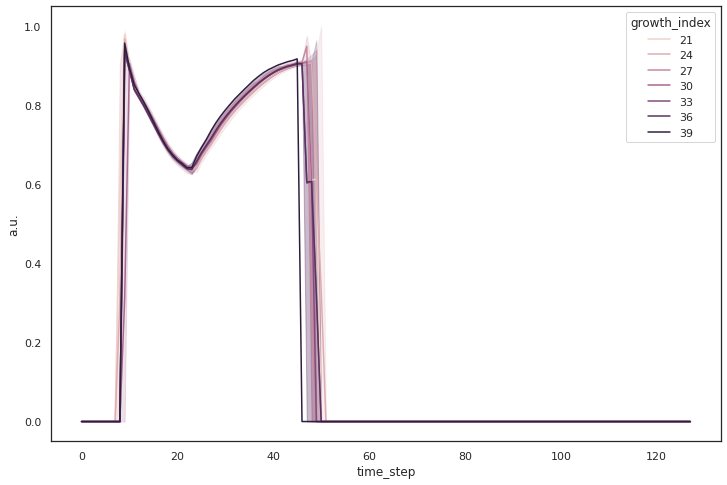

velocity


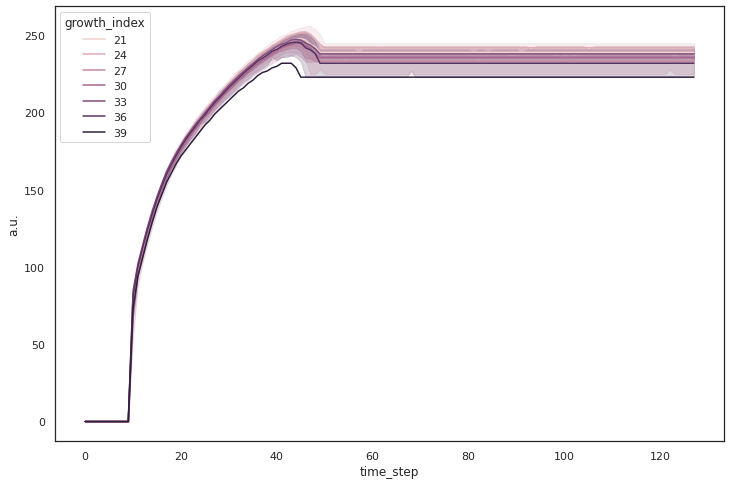

In [32]:
df_new = plot_metrics(df_fine, metrics_name, label_with='growth_index')

### finer step: 3000-4500

In [33]:
df_fine = df[df['growth_index']<60]
df_fine = df_fine[df_fine['growth_index']>40]
df_fine.sample(5)

condition             metric  growth_index  time_step  \
233760  100mj-700c-200mtorr          perimeter            58         32   
204366  100mj-700c-200mtorr       eccentricity            49         78   
118953  100mj-700c-200mtorr         centroid-1            45         41   
90516   100mj-700c-200mtorr  axis_minor_length            44         20   
176325  100mj-700c-200mtorr        orientation            51         69   

              a.u.  
233760  613.890442  
204366    0.000000  
118953  134.459183  
90516   143.592590  
176325    0.000000

area


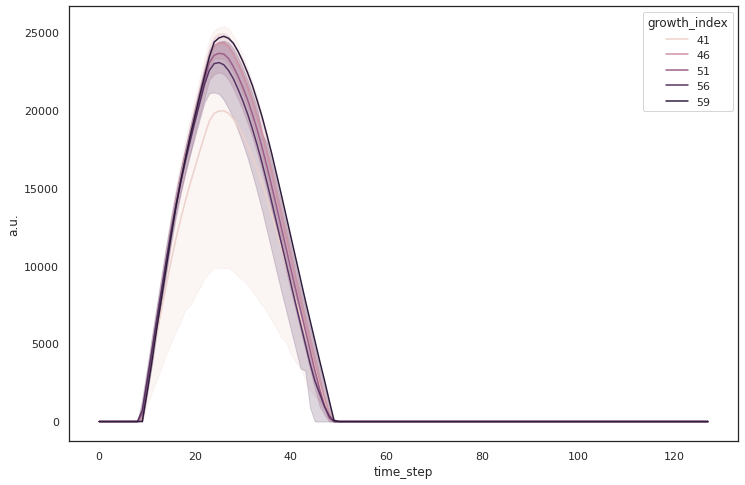

axis_major_length


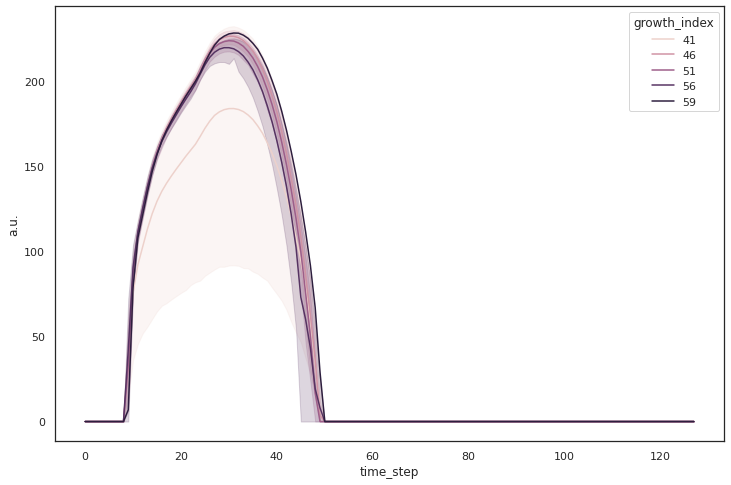

axis_minor_length


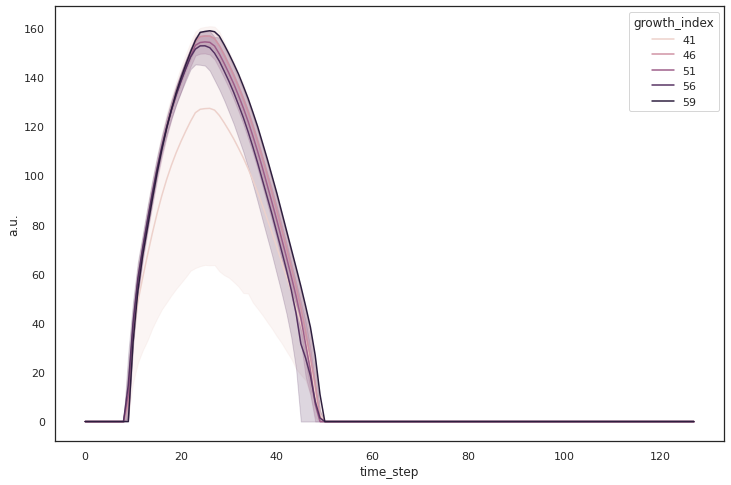

centroid-1


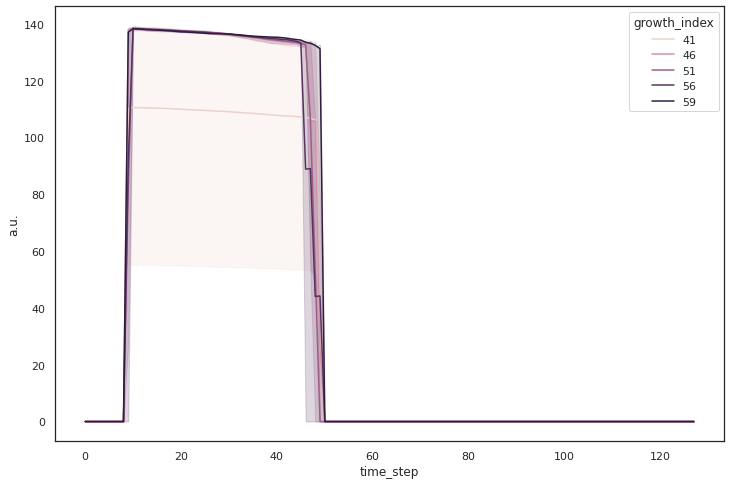

centroid-2


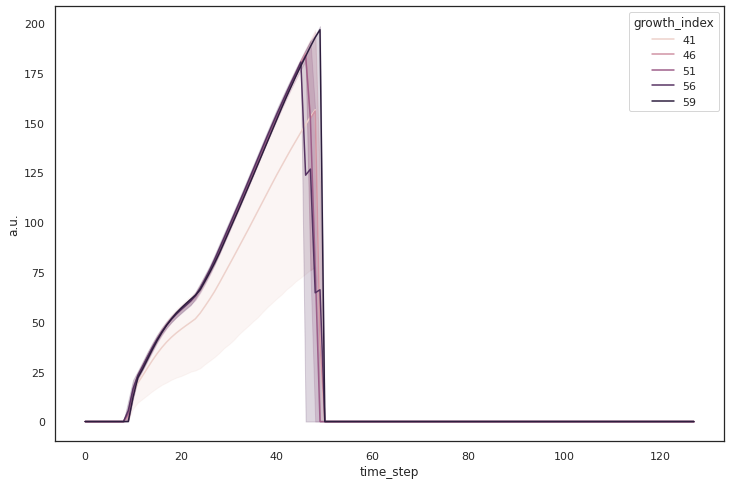

eccentricity


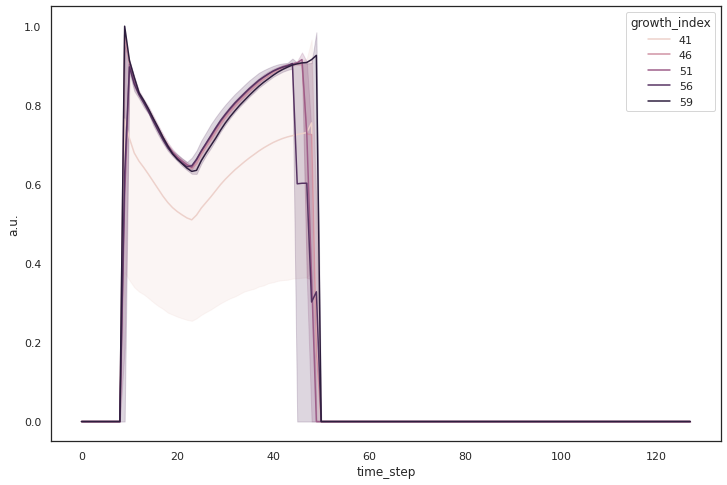

velocity


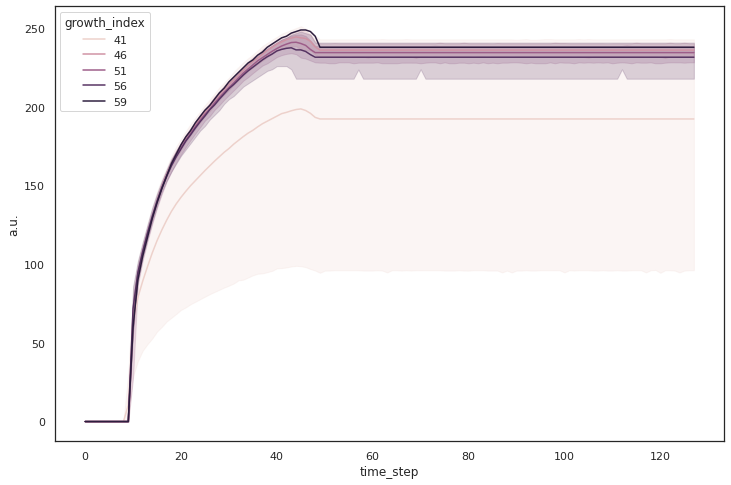

In [34]:
df_new = plot_metrics(df_fine, metrics_name, label_with='growth_index')

### finer step: 4500-6000

In [35]:
df_fine = df[df['growth_index']<80]
df_fine = df_fine[df_fine['growth_index']>60]
df_fine.sample(5)

condition             metric  growth_index  time_step   a.u.
234565  100mj-700c-200mtorr          perimeter            64         69    0.0
263237  100mj-700c-200mtorr           velocity            67         69  233.0
65995   100mj-700c-200mtorr  axis_major_length            73         75    0.0
262786  100mj-700c-200mtorr           velocity            64          2    0.0
178886  100mj-700c-200mtorr        orientation            71         70    0.0

area


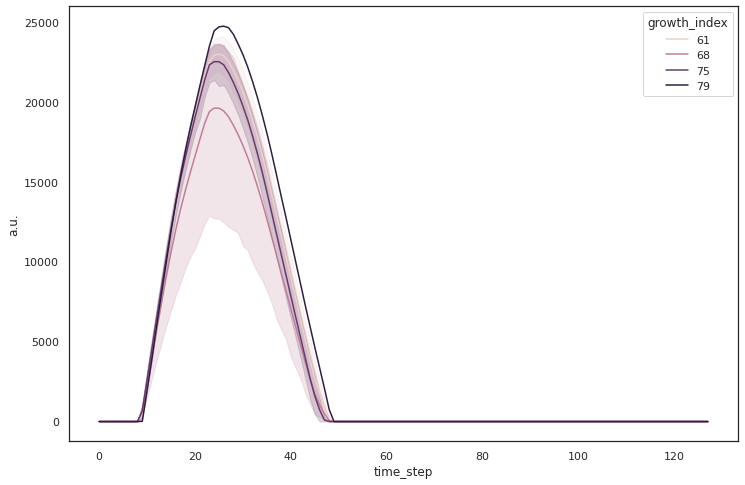

axis_major_length


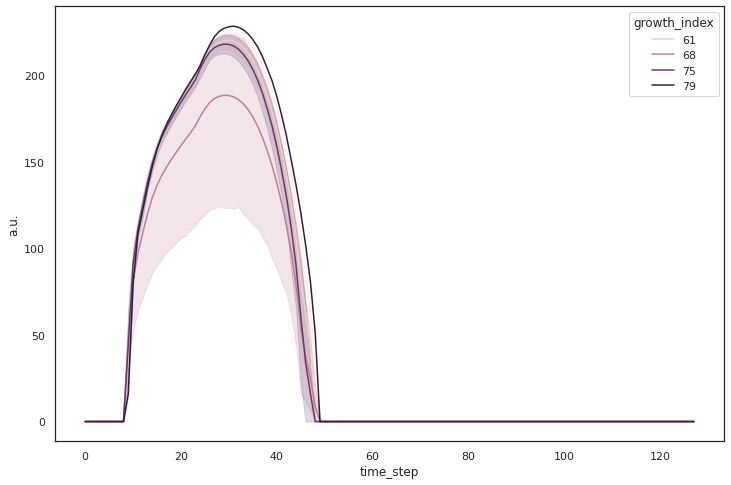

axis_minor_length


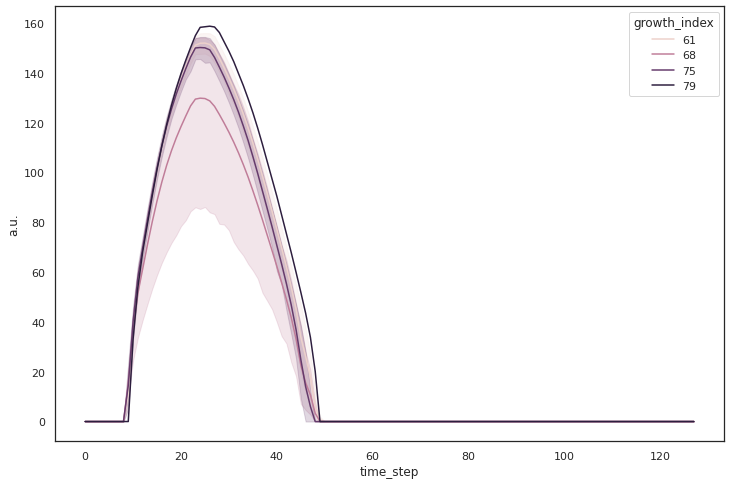

centroid-1


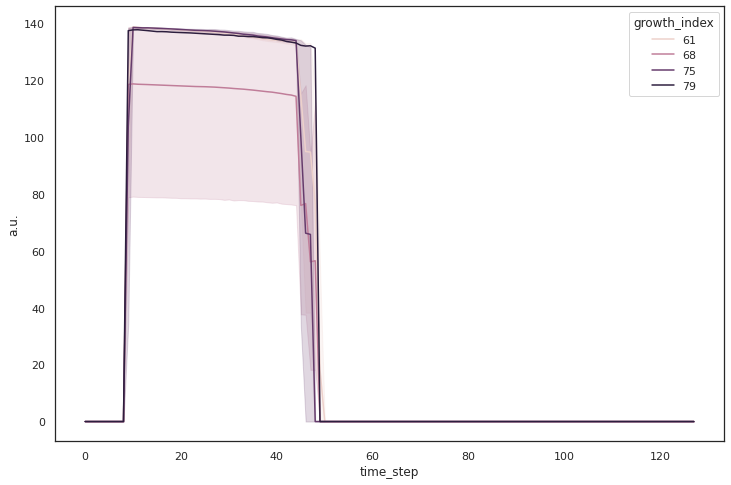

centroid-2


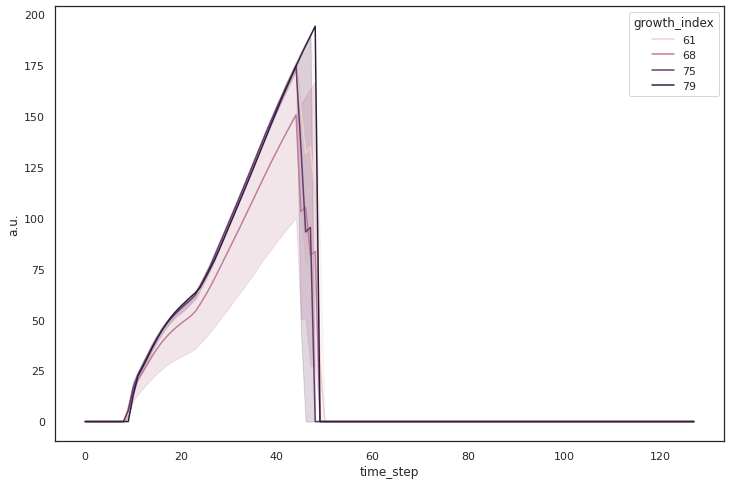

eccentricity


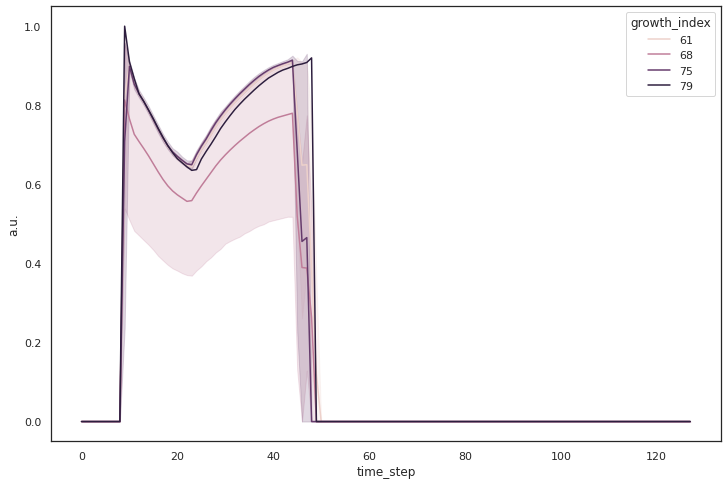

velocity


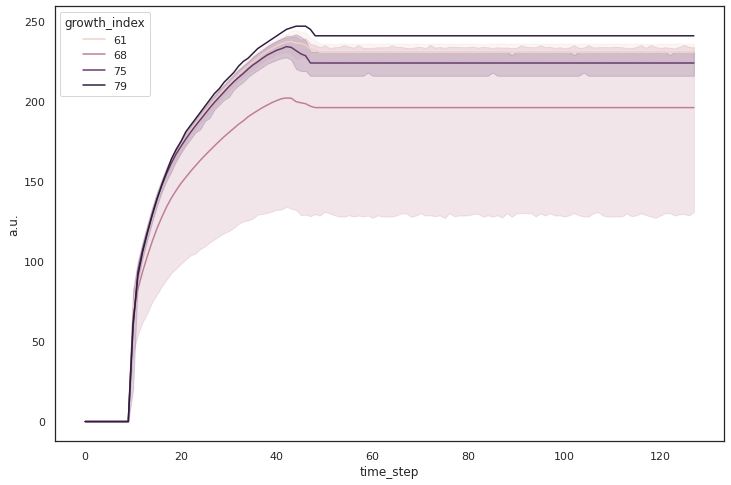

In [36]:
df_new = plot_metrics(df_fine, metrics_name, label_with='growth_index')

### finer step: 6000-7500

In [37]:
df_fine = df[df['growth_index']<100]
df_fine = df_fine[df_fine['growth_index']>80]
df_fine.sample(5)

condition        metric  growth_index  time_step  \
266240  100mj-700c-200mtorr      velocity            91          0   
266751  100mj-700c-200mtorr      velocity            94        127   
208666  100mj-700c-200mtorr  eccentricity            83         26   
38684   100mj-700c-200mtorr   area_filled            81         28   
125255  100mj-700c-200mtorr    centroid-1            94         71   

                a.u.  
266240      0.000000  
266751    219.000000  
208666      0.685898  
38684   23524.000000  
125255      0.000000

area


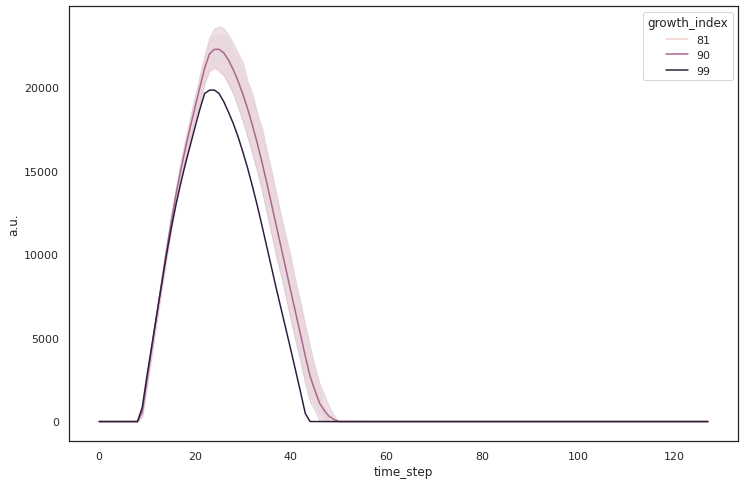

axis_major_length


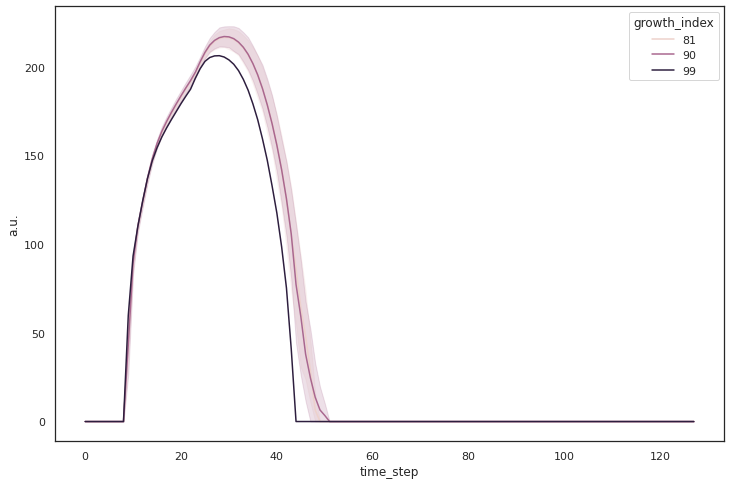

axis_minor_length


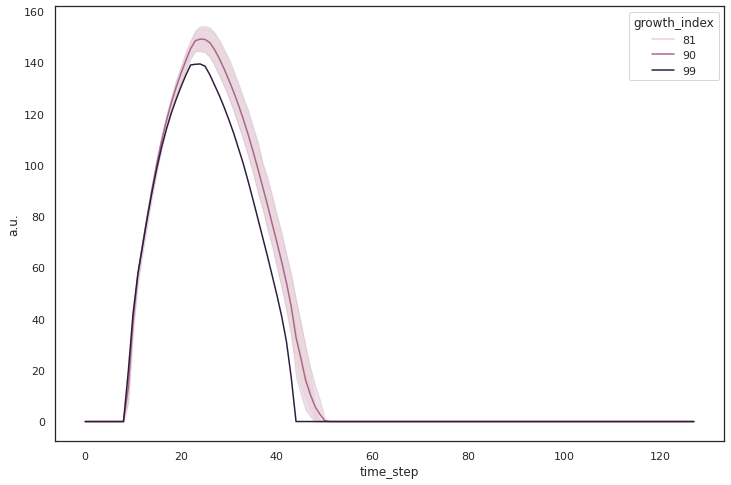

centroid-1


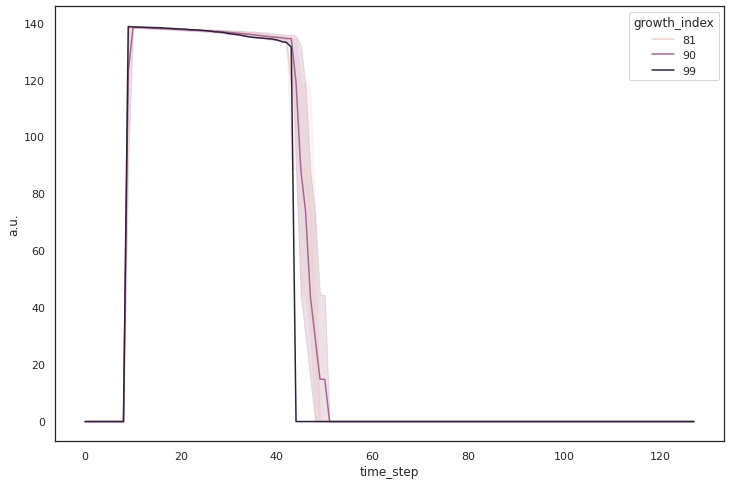

centroid-2


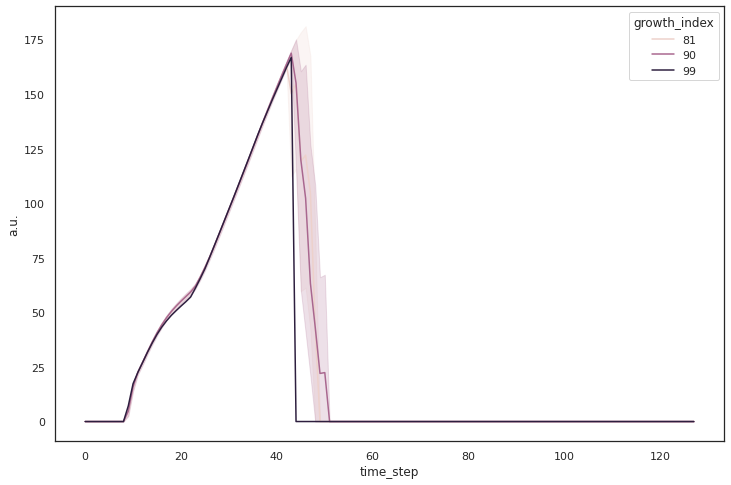

eccentricity


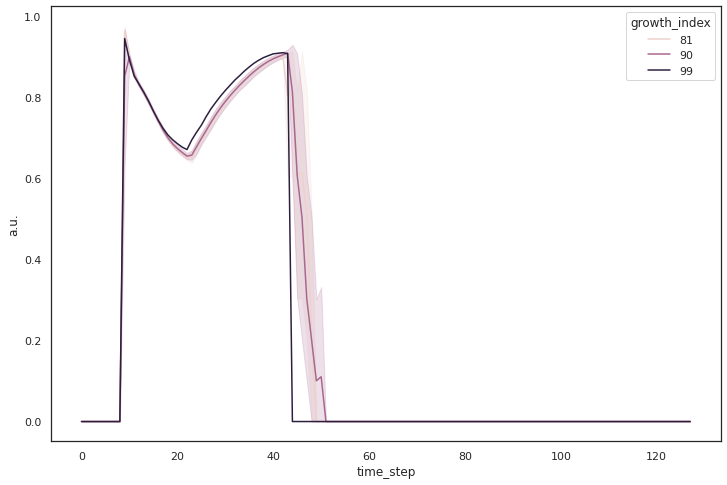

velocity


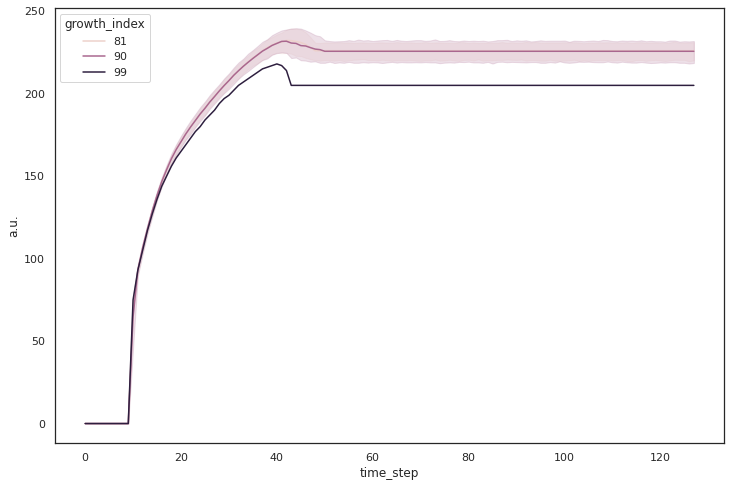

In [38]:
df_new = plot_metrics(df_fine, metrics_name, label_with='growth_index')

# plot -1 

In [8]:
ds_path = '/scratch/yichen/pld_plumes/YG009_Yichen_Guo_04212022.h5'
class_name = 'PLD_Plumes'
show_h5_dataset_name(ds_path, class_name)

<KeysViewHDF5 ['0-SrRuO3', '1-SrRuO3']>


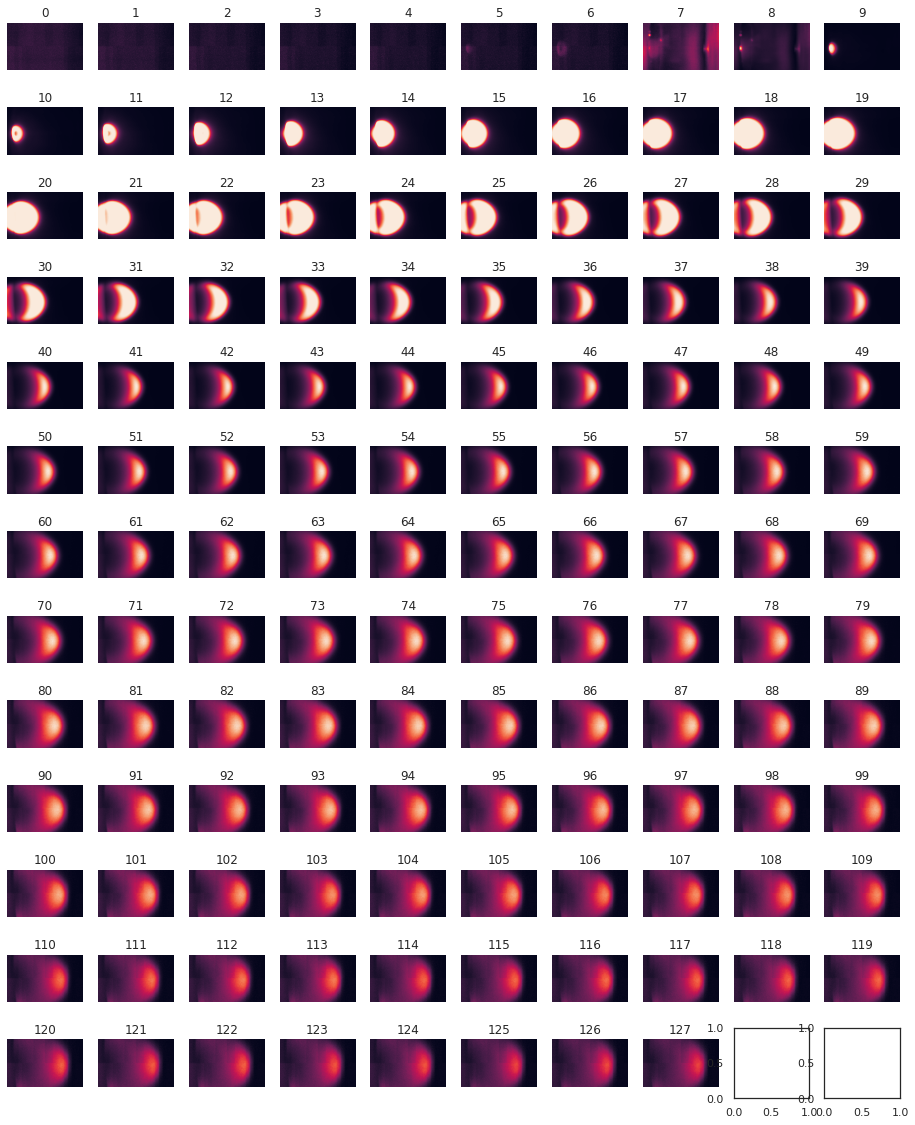

In [9]:
ds_name = '1-SrRuO3'
plumes = load_h5_examples(ds_path, class_name, ds_name, process_func, show=False)
show_images(np.mean(plumes, axis=0), img_per_row=10)

In [10]:
condition = '100mj-700c-200mtorr'
df = plumes_to_df(ds_path, ds_name, condition)
df.sample(n=5)

condition             metric  growth_index  time_step  \
59243  100mj-700c-200mtorr        orientation            36        107   
21969  100mj-700c-200mtorr  axis_major_length            29         81   
8465   100mj-700c-200mtorr               area            66         17   
33023  100mj-700c-200mtorr  axis_minor_length            44        127   
67708  100mj-700c-200mtorr       eccentricity            31        124   

          a.u.  
59243      0.0  
21969      0.0  
8465   11680.0  
33023      0.0  
67708      0.0

area


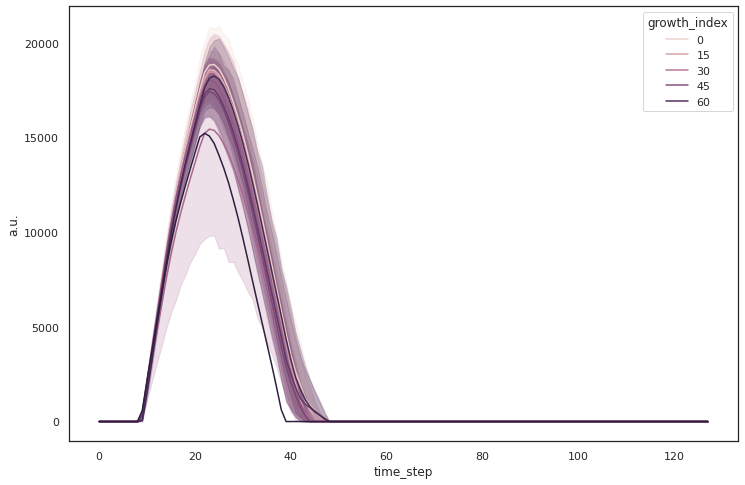

area_filled


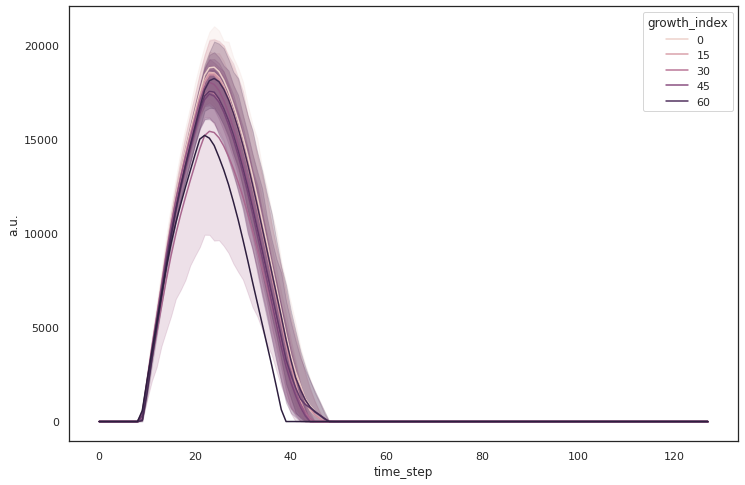

axis_major_length


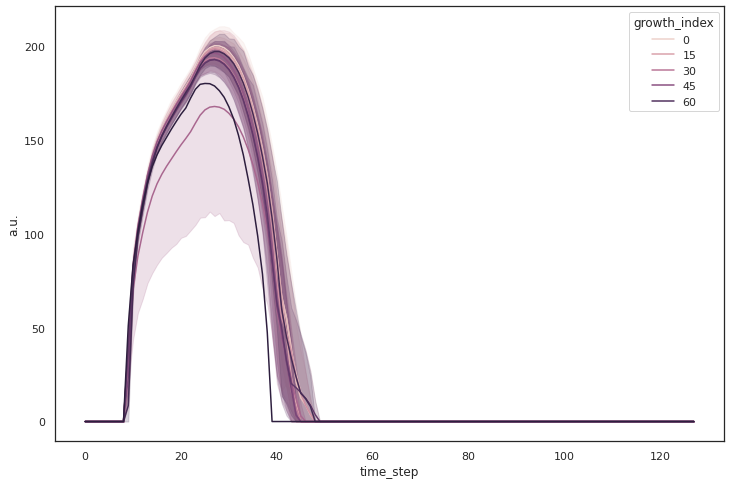

axis_minor_length


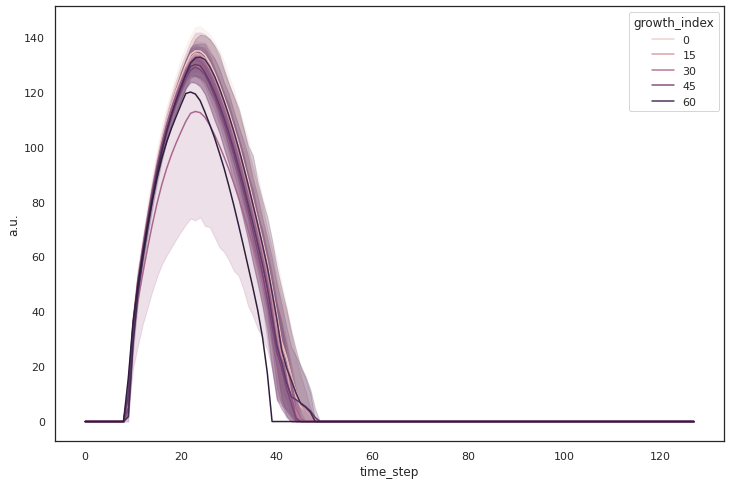

centroid-1


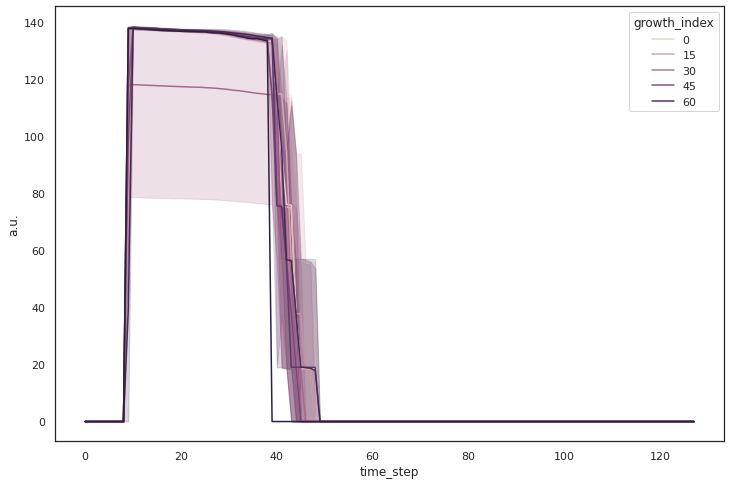

centroid-2


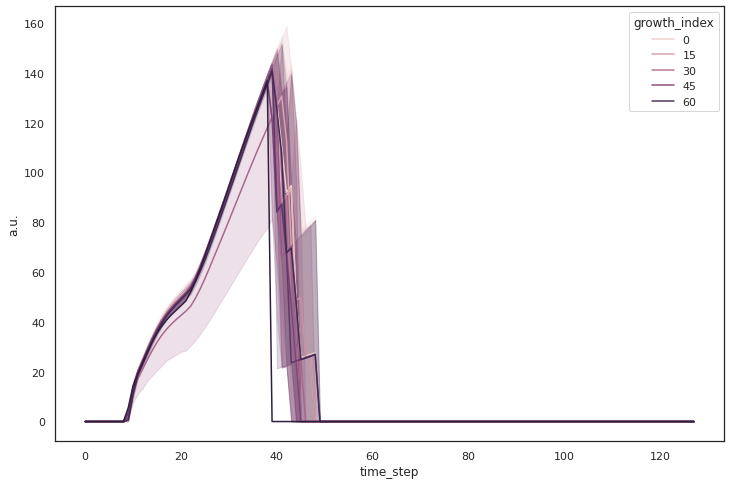

orientation


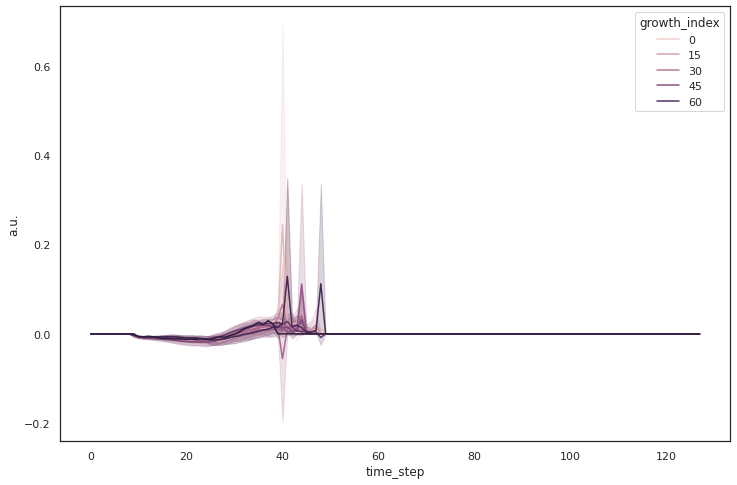

eccentricity


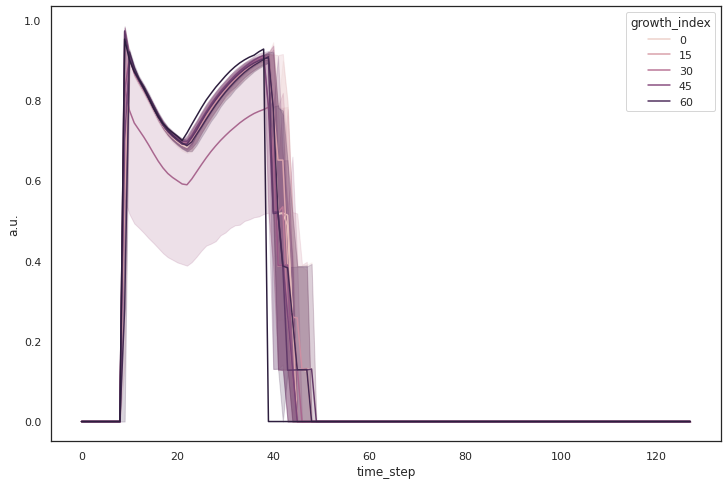

perimeter


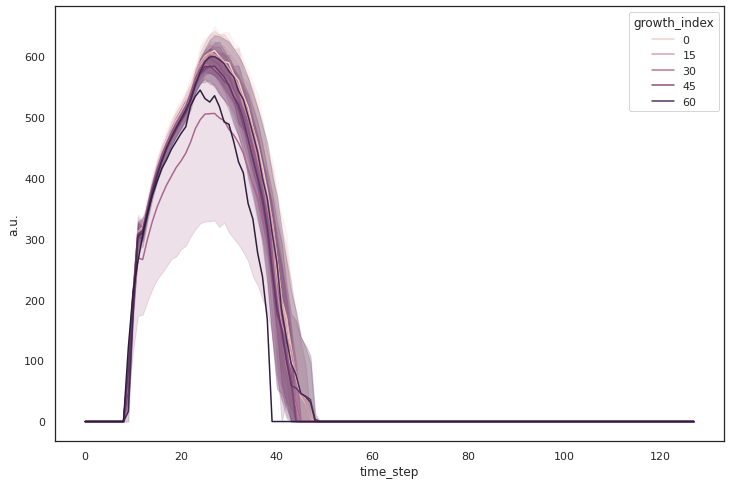

velocity


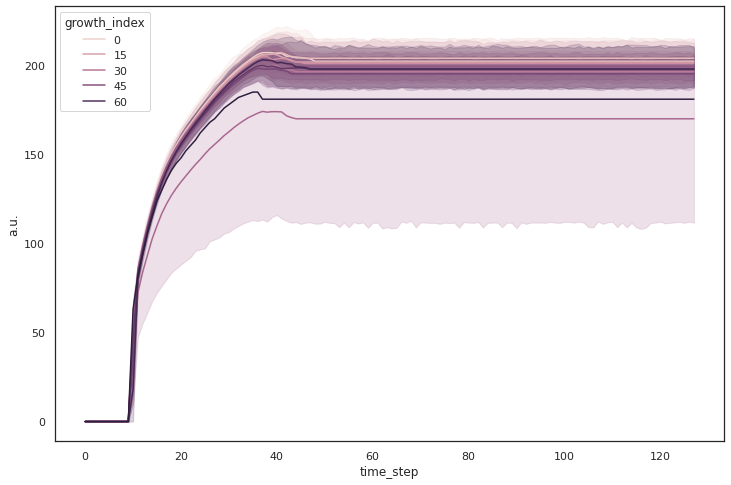

In [11]:
metrics_name = ['area', 'area_filled', 'axis_major_length', 
                'axis_minor_length', 'centroid-1', 'centroid-2', 'orientation', 
                'eccentricity', 'perimeter', 'velocity'] 
df_new = plot_metrics(df, metrics_name, label_with='growth_index')

area


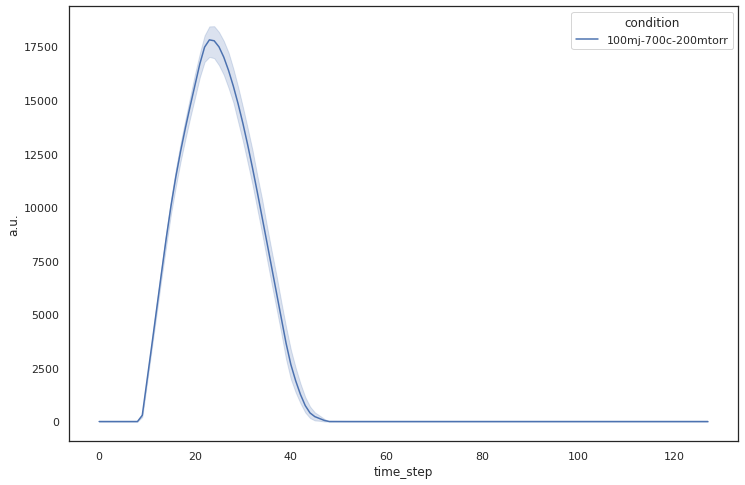

area_filled


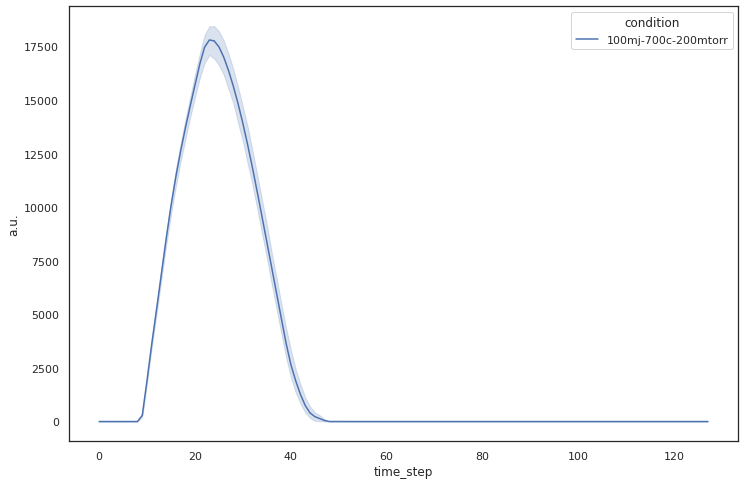

axis_major_length


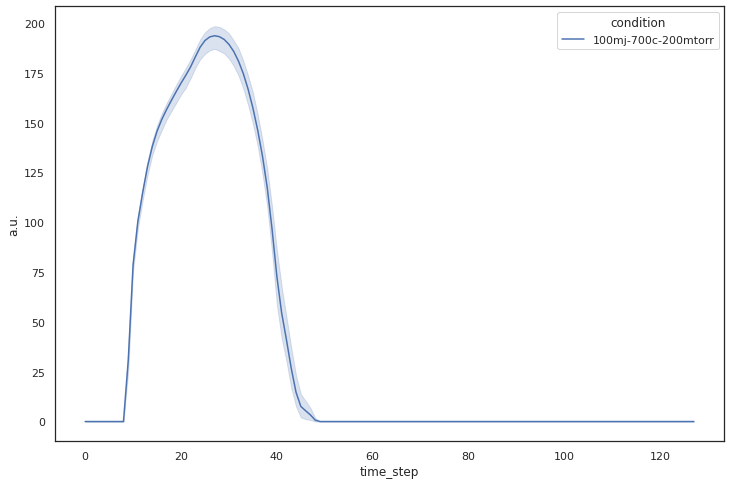

axis_minor_length


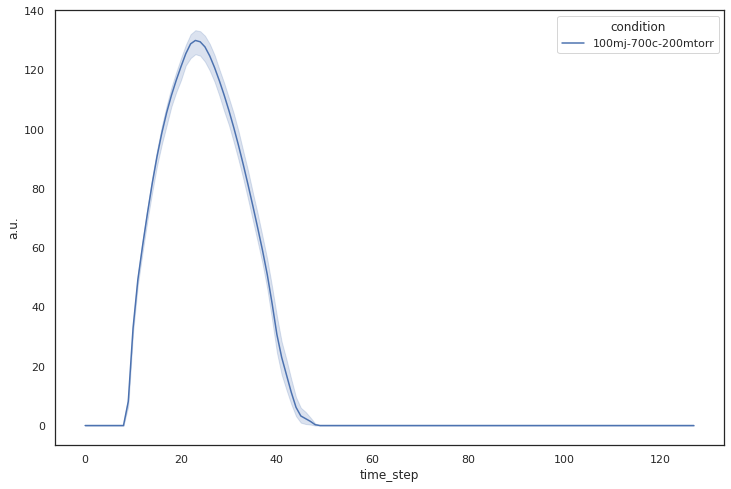

centroid-1


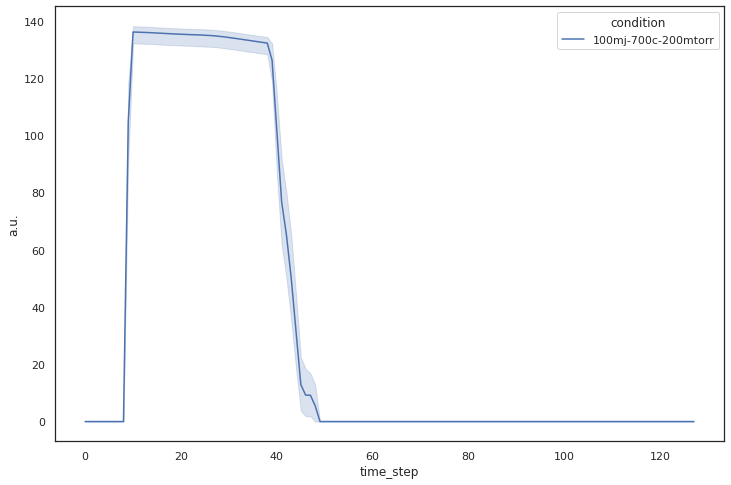

centroid-2


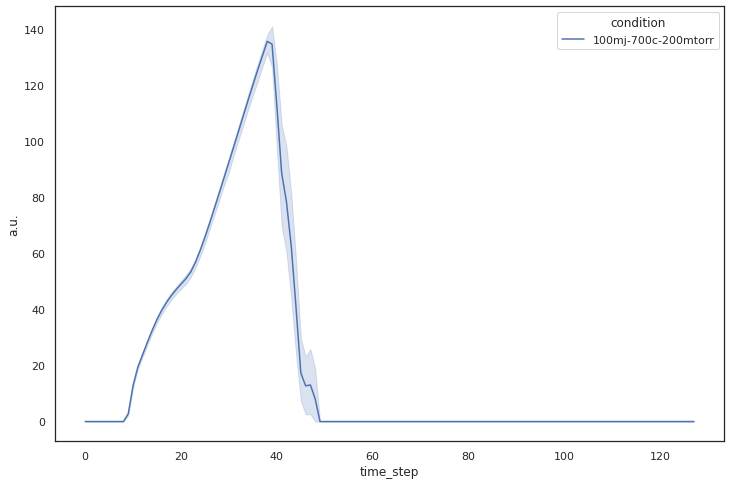

orientation


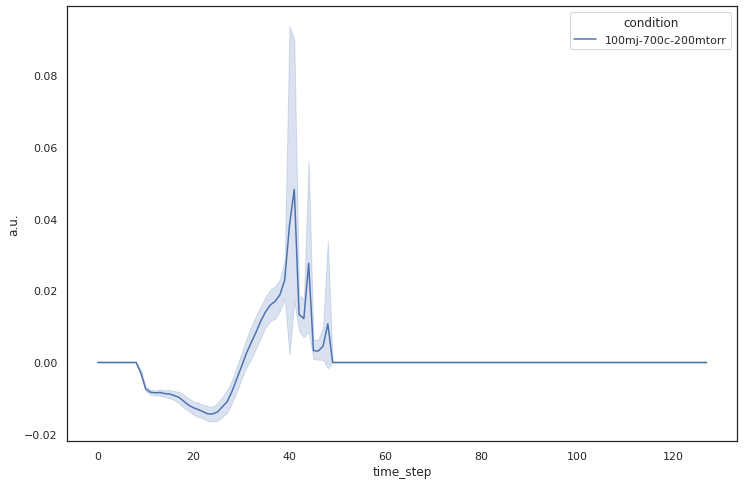

eccentricity


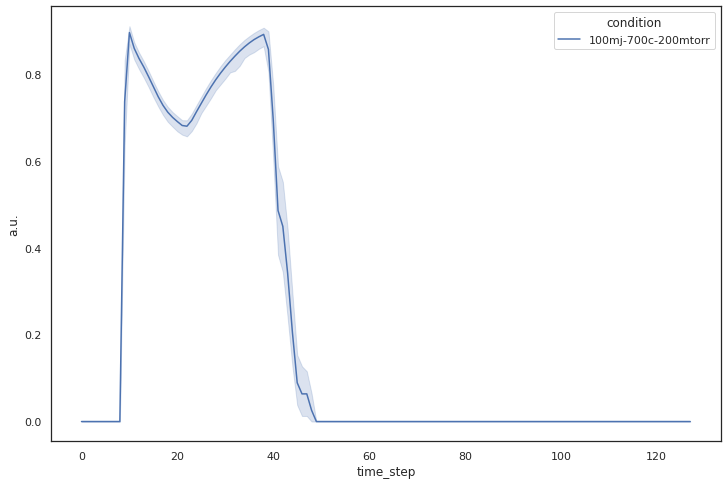

perimeter


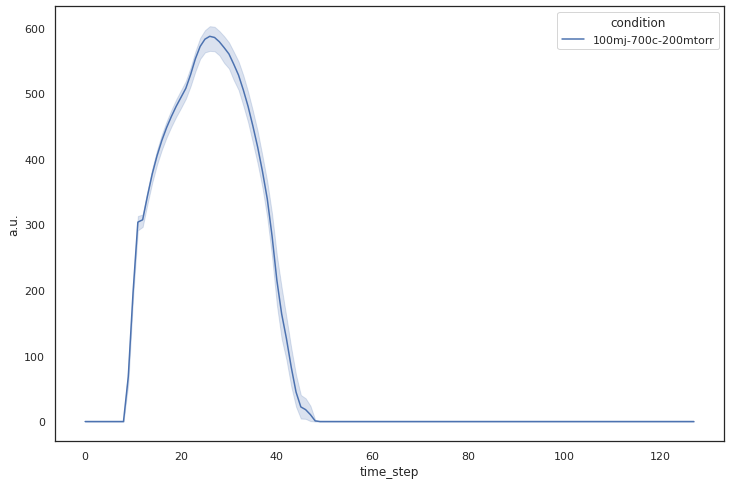

velocity


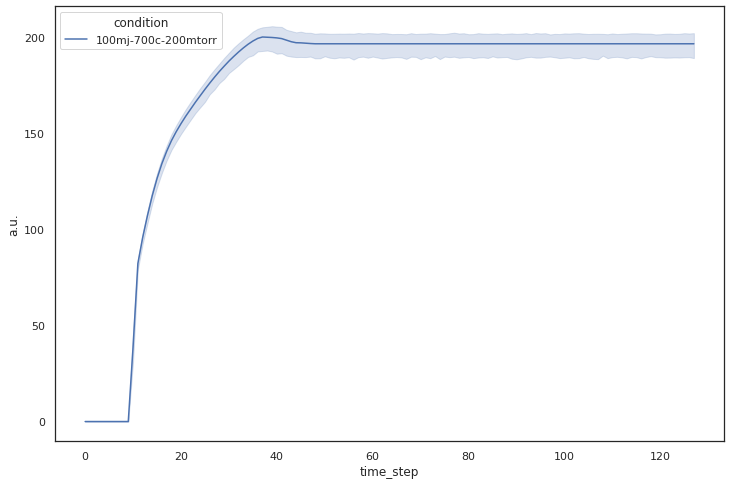

condition    metric  growth_index  time_step   a.u.
0      100mj-700c-200mtorr      area             0          0    0.0
1      100mj-700c-200mtorr      area             0          1    0.0
2      100mj-700c-200mtorr      area             0          2    0.0
3      100mj-700c-200mtorr      area             0          3    0.0
4      100mj-700c-200mtorr      area             0          4    0.0
...                    ...       ...           ...        ...    ...
90875  100mj-700c-200mtorr  velocity            70        123  181.0
90876  100mj-700c-200mtorr  velocity            70        124  181.0
90877  100mj-700c-200mtorr  velocity            70        125  181.0
90878  100mj-700c-200mtorr  velocity            70        126  181.0
90879  100mj-700c-200mtorr  velocity            70        127  181.0

[90880 rows x 5 columns]

In [12]:
metrics_name = ['area', 'area_filled', 'axis_major_length', 
            'axis_minor_length', 'centroid-1', 'centroid-2', 'orientation', 
            'eccentricity', 'perimeter', 'velocity'] 
plot_metrics(df, metrics_name, label_with='condition')